![qqq](../resources/header.jpg)

**Предварительная обработка и разведочный анализ данных**
***

О сайте **Backloggd.com**:

"**Backloggd** — это место для хранения вашей личной коллекции видеоигр. Каждая игра со всех платформ доступна для вас, чтобы вы могли войти в свой журнал. Следуйте за друзьями, чтобы поделиться своими отзывами и сравнить рейтинги. Затем используйте фильтры, чтобы отсортировать свою коллекцию и посмотреть, что для вас важно. Ведите список того, во что вы сейчас играете и во что хотите играть, и наблюдайте, как цифры меняются по мере того, как вы продолжаете записывать свои прохождения. Есть Goodreads для книг, Letterboxd для фильмов и теперь Backloggd для игр.

Все метаданные, связанные с игрой, поступают из базы данных **[IGDB](https://www.igdb.com/)**, управляемой сообществом . Сюда входят все данные об играх, компаниях и платформах, которые вы видите на сайте." - с сайта **[backloggd.com](https://www.backloggd.com/)**.

**Цель разведочного анализа данных**: провести анализ основных свойств данных, выявить распределения, общие зависимости и аномалии с помощью инструментов визуализации.

**Этапы разведочного анализа данных**:
1. [Обзор данных](#Обзор-данных).
2. [Предварительная обработка данных](#Предварительная-обработка-данных).
    - [Обработка названий полей](#Обработка-названий-полей);
    - [Проверка целостности связей между таблицами](#Проверка-целостности-связей-между-таблицами)
    - [Обработка явных дубликатов](#Обработка-явных-дубликатов);
    - [Изменение структуры данных](#Изменение-структуры-данных);
    - [Обработка пустых записей](#Обработка-пустых-записей);
    - [Обработка типов даных](#Обработка-типов-даных);
    - [Поиск неявных дубликатов](#Поиск-неявных-дубликатов);
    - [Анализ изображений](#Анализ-изображений)
    - [Выводы по предварительной обработке данных](#Выводы-по-предварительной-обработке-данных).
3. [Разведочный анализ данных](#Разведочный-анализ-данных)
    - [Анализ даты выпуска видеоигр](#Анализ-даты-выпуска-видеоигр);
    - [Анализ числовых данных](#Анализ-числовых-данных);
        - [Анализ рейтинга видеоигр](#Анализ-рейтинга-видеоигр).
    - [Анализ категориальных данных](#Анализ-категориальных-данных);
        - [Анализ игровых платформ](#Анализ-игровых-платформ);
        - [Анализ игровых жанров](#Анализ-игровых-жанров).
    - [Выводы по разведочному анализу](#Выводы-по-разведочному-анализу).
4. [Выводы](#Выводы)
***

In [1]:
import sys

In [2]:
sys.path.append('C:\Projects\Backloggd\src')

In [3]:
import os

import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec

from config.paths import PATH_RAW_DATA
from utils.explorer import explorer
from utils import plot

In [4]:
sns.set_style('white')

In [5]:
print(explorer(PATH_RAW_DATA, exclude=('checkpoints', )))

1. backloggd.


In [6]:
folder = 'backloggd'

In [7]:
print(explorer(f'{PATH_RAW_DATA}/{folder}', '*.csv'))

1. developers.csv.
2. games.csv.
3. genres.csv.
4. platforms.csv.
5. scores.csv.


In [8]:
file_paths ={
    'games': f'{PATH_RAW_DATA}/{folder}/games.csv',
    'developers': f'{PATH_RAW_DATA}/{folder}/developers.csv',
    'genres': f'{PATH_RAW_DATA}/{folder}/genres.csv',
    'platforms': f'{PATH_RAW_DATA}/{folder}/platforms.csv',
    'scores': f'{PATH_RAW_DATA}/{folder}/scores.csv',
}

# Обзор данных
***

In [9]:
df = {file: pd.read_csv(path) for file, path in file_paths.items()}

In [10]:
df['games'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172512 entries, 0 to 172511
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           172512 non-null  int64  
 1   name         172512 non-null  object 
 2   date         137731 non-null  object 
 3   rating       55569 non-null   float64
 4   reviews      172511 non-null  float64
 5   plays        171818 non-null  float64
 6   playing      171818 non-null  float64
 7   backlogs     171818 non-null  float64
 8   wishlists    171818 non-null  float64
 9   description  153588 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 94.3 MB


In [11]:
pd.concat([
    df['games'].head(),
    df['games'].sample(5),
    df['games'].tail()
])

id                                          name        date  \
0       1000001             Cathode Ray Tube Amusement Device  1947-12-31   
1       1000002                              Bertie the Brain  1950-08-25   
2       1000003                                           Nim  1951-12-31   
3       1000004                                      Draughts  1952-08-31   
4       1000005                                           OXO  1952-12-31   
129484  1129485                                       Pokipet  2023-05-02   
38181   1038182                           Ship Simulator 2008  2007-08-15   
165192  1165193    Gekitotsu! Saikyou Pro Yakyuu Dream Battle         NaN   
16433   1016434                                 Tricky Quicky  1995-12-31   
30733   1030734  Wizardry Empire III: Ancestry of the Emperor  2003-12-25   
172507  1172508   Super Robot Wars 30: Digital Deluxe Edition         NaN   
172508  1172509            Xotic: Temple Crypt Expansion Pack         NaN   
172509  1172510                                  Dust Raiders         NaN   
172510  1172511                                     EXE Clash         NaN   
172511  1172512       Dance Killer Trick!!!: Boys, Be Dancing         NaN   

        rating  reviews  plays  playing  backlogs  wishlists  \
0          3.5     65.0  117.0      1.0      28.0       56.0   
1          2.5     11.0   24.0      0.0       6.0       12.0   
2          1.8      2.0   11.0      0.0       2.0        6.0   
3          2.4      3.0   17.0      0.0       3.0        7.0   
4          3.1     14.0   52.0      1.0      12.0       13.0   
129484     NaN      1.0    2.0      0.0       0.0        0.0   
38181      NaN      0.0    0.0      0.0       0.0        0.0   
165192     NaN      0.0    0.0      0.0       0.0        0.0   
16433      NaN      0.0    2.0      0.0       0.0        0.0   
30733      NaN      0.0    3.0      0.0       7.0        4.0   
172507     NaN      0.0    0.0      0.0       0.0        0.0   
172508     NaN      0.0    1.0      0.0       0.0        0.0   
172509     NaN      0.0    0.0      0.0       0.0        2.0   
172510     NaN      0.0    0.0      0.0       0.0        1.0   
172511     NaN      0.0    2.0      0.0       0.0        1.0   

                                              description  
0       The cathode ray tube amusement device is the e...  
1       Currently considered the first videogame in hi...  
2       The Nimrod was a special purpose computer that...  
3       A game of draughts (a.k.a. checkers) written f...  
4       OXO was a computer game developed by Alexander...  
129484  Create a group pet with your friends, family, ...  
38181   Ship Simulator is a vehicle simulation compute...  
165192                                                NaN  
16433   Tricky Quicky is a promotional adventure actio...  
30733   The third game in Starfish's Empire spin-offs ...  
172507                                                NaN  
172508  Explore the mystical crypts and forgotten pass...  
172509  Dust Raiders is a management strategy game, se...  
172510  A platform fighting game featuring many spooky...  
172511  Dance Killer Trick!!!: Boys, Be Dancing is an ...

In [12]:
df['developers'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143454 entries, 0 to 143453
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         143454 non-null  int64 
 1   developer  143453 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.7 MB


In [13]:
pd.concat([
    df['developers'].head(),
    df['developers'].sample(5),
    df['developers'].tail()
])

id                         developer
0       1000002                       Josef Kates
1       1000004              Christopher Strachey
2       1000005  Alexander Shafto "Sandy" Douglas
3       1000005             University of Warwick
4       1000007               William Higinbotham
2940    1002417      APh Technological Consulting
126504  1124084                             Zakym
80650   1068309       Good Shepherd Entertainment
72251   1059752             Majesco Entertainment
71981   1059542                 Microsoft Studios
143449  1172491                           DVloper
143450  1172495                 Keepsake Games AB
143451  1172496                   Fox Interactive
143452  1172496                      Bits Studios
143453  1172512                            Konami

In [14]:
df['genres'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286025 entries, 0 to 286024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      286025 non-null  int64 
 1   genre   286025 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.7 MB


In [15]:
pd.concat([
    df['genres'].head(),
    df['genres'].sample(5),
    df['genres'].tail()
])

id                genre
0       1000001      Point-and-Click
1       1000002               Puzzle
2       1000002             Tactical
3       1000003              Pinball
4       1000003             Strategy
202393  1115381             Fighting
84111   1058202            Adventure
1415    1001004  Turn Based Strategy
9855    1006723                  RPG
262994  1151908                Indie
286020  1172509                Indie
286021  1172510                Indie
286022  1172510             Strategy
286023  1172511             Fighting
286024  1172512                Music

In [16]:
df['platforms'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261475 entries, 0 to 261474
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        261475 non-null  int64 
 1   platform  261475 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.6 MB


In [17]:
pd.concat([
    df['platforms'].head(),
    df['platforms'].sample(5),
    df['platforms'].tail()
])

id                  platform
0       1000001      Analogue electronics
1       1000002                    Arcade
2       1000003  Ferranti Nimrod Computer
3       1000004           Legacy Computer
4       1000005                Windows PC
90946   1054256                Windows PC
169774  1093735                       iOS
127515  1071759                       Mac
201012  1110148             PlayStation 5
182156  1100283                Windows PC
261470  1172495                Windows PC
261471  1172496               Nintendo 64
261472  1172511                Windows PC
261473  1172512                   Android
261474  1172512                       iOS

In [18]:
df['scores'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725120 entries, 0 to 1725119
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   score   float64
 2   amount  int64  
dtypes: float64(1), int64(2)
memory usage: 39.5 MB


In [19]:
pd.concat([
    df['scores'].head(),
    df['scores'].sample(5),
    df['scores'].tail()
])

id  score  amount
0        1000001    0.5      10
1        1000001    1.0       5
2        1000001    1.5       1
3        1000001    2.0       3
4        1000001    2.5       9
525123   1052513    2.0      11
684778   1068478    4.5       1
1574661  1157467    1.0       0
153167   1015317    4.0       0
890717   1089072    4.0       0
1725115  1172512    3.0       0
1725116  1172512    3.5       1
1725117  1172512    4.0       0
1725118  1172512    4.5       0
1725119  1172512    5.0       0

In [20]:
directory = f'{PATH_RAW_DATA}/{folder}/posters'

In [21]:
files = os.listdir(directory)

In [22]:
posters = pd.Series(files)

In [23]:
posters

0         1000001.jpg
1         1000003.jpg
2         1000004.jpg
3         1000005.jpg
4         1000006.jpg
             ...     
156503    1172508.jpg
156504    1172509.jpg
156505    1172510.jpg
156506    1172511.jpg
156507    1172512.jpg
Length: 156508, dtype: object

# Предварительная обработка данных
***

In [24]:
records = {name: data.shape[0] for name, data in df.items()}
records

{'games': 172512,
 'developers': 143454,
 'genres': 286025,
 'platforms': 261475,
 'scores': 1725120}

## Обработка названий полей
***

In [25]:
for name, data in df.items():
    print(f'{name:10} {", ".join(data.columns.tolist())}')

games      id, name, date, rating, reviews, plays, playing, backlogs, wishlists, description
developers id, developer
genres     id, genre
platforms  id, platform
scores     id, score, amount


Оставим названия полей **без изменений**.

## Проверка целостности связей между таблицами

In [26]:
table = pd.DataFrame(
    index=[name for name in df if name != 'games'],
    columns=['Нет первичных ключей', 'Нет внешних ключей']
)

games = set(df['games']['id'])

for name, data in df.items():
    if name != 'games':
        ids = set(data['id'])
    
        table.loc[name, 'Нет первичных ключей'] = len(ids - games)
        table.loc[name, 'Нет внешних ключей'] = len(games - ids)

table

Нет первичных ключей Нет внешних ключей
developers                    0              71490
genres                        0              25143
platforms                     0              28479
scores                        0                  0

**Примечание**:
1. **Нет первичных ключей**: ключи (id) присутвтуют в дополнительных файлах, но при этом, отсутствуют в основном файле (movies.csv), что не позволяет идентифицировать данные (например, определить, к какому фильму принадлежать актеры или жанры).
2. **Нет внешних ключей**: ключи (id) присутвтуют в основном файле (movies.csv), но при этом, отсутствуют в дополнительных файлах (у фильма отсутствуют данные об актерах, жанрах и тд.)

## Обработка явных дубликатов
***

In [27]:
table = pd.DataFrame(
    data={
        'Количество': [data.duplicated().sum() for data in df.values()],
        'Проценты': [data.duplicated().sum() / records[name] for name, data in df.items()],
    },
    index=[data for data in df]
)
table.loc['Всего', :] = [table['Количество'].sum(),  
                         table['Количество'].sum() / 
                         sum([record for record in records.values()])]
table = table.astype({'Количество': 'int32'})
(table
 .style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

In [28]:
for name in df:
    df[name] = df[name].drop_duplicates()

In [29]:
table = pd.DataFrame(
    data={
        'Количество': [data.duplicated().sum() for data in df.values()],
        'Проценты': [data.duplicated().sum() / records[name] for name, data in df.items()],
    },
    index=[data for data in df]
)
table.loc['Всего', :] = [table['Количество'].sum(),  
                         table['Количество'].sum() / 
                         sum([record for record in records.values()])]
table = table.astype({'Количество': 'int32'})
(table
 .style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

## Изменение структуры данных
***

Рассмотрим жанры видеоигр.

In [30]:
df['genres']['genre'].unique().tolist()

['Point-and-Click',
 'Puzzle',
 'Tactical',
 'Pinball',
 'Strategy',
 'Card & Board Game',
 'Sport',
 'Arcade',
 'Simulator',
 'Shooter',
 'Turn Based Strategy',
 'Racing',
 'Indie',
 'Adventure',
 'Real Time Strategy',
 'RPG',
 'Quiz/Trivia',
 'Fighting',
 'Platform',
 'Brawler',
 'Visual Novel',
 'Music',
 'MOBA']

Согласно [Википедии](https://ru.wikipedia.org/wiki/Инди-игра), инди-игра - компьютерная игра, созданная **отдельным разработчиком** или небольшим коллективом без финансовой поддержки издателя компьютерных игр. Добавим новое поле **indie** с логической переменной, которая будет указывать, является ли видеоигра инди-игрой.

In [31]:
def indie(key: int, genres: pd.Series):
    value = genres[key] if key in genres.index else False
    if isinstance(value, pd.Series):
        return True if 'Indie' in value.tolist() else False
    elif isinstance(value, str):
        return True if value == 'Indie' else False
    else:
        return False 

In [32]:
genres = df['genres'].set_index('id')['genre']
df['games'].insert(
    loc=3,
    column='indie',
    value=(df['games']['id']
           .apply(indie, genres=genres)
           .values)
)

In [33]:
df['games'].head()

id                               name        date  indie  rating  \
0  1000001  Cathode Ray Tube Amusement Device  1947-12-31  False     3.5   
1  1000002                   Bertie the Brain  1950-08-25  False     2.5   
2  1000003                                Nim  1951-12-31  False     1.8   
3  1000004                           Draughts  1952-08-31  False     2.4   
4  1000005                                OXO  1952-12-31  False     3.1   

   reviews  plays  playing  backlogs  wishlists  \
0     65.0  117.0      1.0      28.0       56.0   
1     11.0   24.0      0.0       6.0       12.0   
2      2.0   11.0      0.0       2.0        6.0   
3      3.0   17.0      0.0       3.0        7.0   
4     14.0   52.0      1.0      12.0       13.0   

                                         description  
0  The cathode ray tube amusement device is the e...  
1  Currently considered the first videogame in hi...  
2  The Nimrod was a special purpose computer that...  
3  A game of draughts (a.k.a. checkers) written f...  
4  OXO was a computer game developed by Alexander...

In [34]:
df['games']['indie'].value_counts()

indie
False    122011
True      50501
Name: count, dtype: int64

Удалим значение **Indie** из поля **genres**.

In [35]:
df['genres'] = df['genres'][df['genres']['genre'] != 'Indie']

In [36]:
df['genres']['genre'].unique().tolist()

['Point-and-Click',
 'Puzzle',
 'Tactical',
 'Pinball',
 'Strategy',
 'Card & Board Game',
 'Sport',
 'Arcade',
 'Simulator',
 'Shooter',
 'Turn Based Strategy',
 'Racing',
 'Adventure',
 'Real Time Strategy',
 'RPG',
 'Quiz/Trivia',
 'Fighting',
 'Platform',
 'Brawler',
 'Visual Novel',
 'Music',
 'MOBA']

Убедимя, что поле **rating** является средним значением оценок пользователей в наборе **votes**.

In [37]:
df['scores']

id  score  amount
0        1000001    0.5      10
1        1000001    1.0       5
2        1000001    1.5       1
3        1000001    2.0       3
4        1000001    2.5       9
...          ...    ...     ...
1725115  1172512    3.0       0
1725116  1172512    3.5       1
1725117  1172512    4.0       0
1725118  1172512    4.5       0
1725119  1172512    5.0       0

[1725120 rows x 3 columns]

In [38]:
df['scores']['score'].value_counts()

score
0.5    172512
1.0    172512
1.5    172512
2.0    172512
2.5    172512
3.0    172512
3.5    172512
4.0    172512
4.5    172512
5.0    172512
Name: count, dtype: int64

In [39]:
def rating(key: int, scores: pd.DataFrame):
    values = scores.loc[key, :]
    if (total := values['amount'].sum()) >= 5:
        return (values['score'] * values['amount']).sum() / total
    else:
        return np.nan

In [40]:
scores = df['scores'].set_index('id')
df['games']['id'].apply(rating, scores=scores)

0         3.529070
1         2.535714
2         1.750000
3         2.388889
4         3.066667
            ...   
172507         NaN
172508         NaN
172509         NaN
172510         NaN
172511         NaN
Name: id, Length: 172512, dtype: float64

In [41]:
df['games']

id                                         name        date  \
0       1000001            Cathode Ray Tube Amusement Device  1947-12-31   
1       1000002                             Bertie the Brain  1950-08-25   
2       1000003                                          Nim  1951-12-31   
3       1000004                                     Draughts  1952-08-31   
4       1000005                                          OXO  1952-12-31   
...         ...                                          ...         ...   
172507  1172508  Super Robot Wars 30: Digital Deluxe Edition         NaN   
172508  1172509           Xotic: Temple Crypt Expansion Pack         NaN   
172509  1172510                                 Dust Raiders         NaN   
172510  1172511                                    EXE Clash         NaN   
172511  1172512      Dance Killer Trick!!!: Boys, Be Dancing         NaN   

        indie  rating  reviews  plays  playing  backlogs  wishlists  \
0       False     3.5     65.0  117.0      1.0      28.0       56.0   
1       False     2.5     11.0   24.0      0.0       6.0       12.0   
2       False     1.8      2.0   11.0      0.0       2.0        6.0   
3       False     2.4      3.0   17.0      0.0       3.0        7.0   
4       False     3.1     14.0   52.0      1.0      12.0       13.0   
...       ...     ...      ...    ...      ...       ...        ...   
172507  False     NaN      0.0    0.0      0.0       0.0        0.0   
172508   True     NaN      0.0    1.0      0.0       0.0        0.0   
172509   True     NaN      0.0    0.0      0.0       0.0        2.0   
172510  False     NaN      0.0    0.0      0.0       0.0        1.0   
172511  False     NaN      0.0    2.0      0.0       0.0        1.0   

                                              description  
0       The cathode ray tube amusement device is the e...  
1       Currently considered the first videogame in hi...  
2       The Nimrod was a special purpose computer that...  
3       A game of draughts (a.k.a. checkers) written f...  
4       OXO was a computer game developed by Alexander...  
...                                                   ...  
172507                                                NaN  
172508  Explore the mystical crypts and forgotten pass...  
172509  Dust Raiders is a management strategy game, se...  
172510  A platform fighting game featuring many spooky...  
172511  Dance Killer Trick!!!: Boys, Be Dancing is an ...  

[172512 rows x 11 columns]

In [42]:
df['games'].loc[:, 'rating'] = (df['games']['id']
                                .apply(rating, scores=scores)
                                .astype('float32'))

In [43]:
df['games']

id                                         name        date  \
0       1000001            Cathode Ray Tube Amusement Device  1947-12-31   
1       1000002                             Bertie the Brain  1950-08-25   
2       1000003                                          Nim  1951-12-31   
3       1000004                                     Draughts  1952-08-31   
4       1000005                                          OXO  1952-12-31   
...         ...                                          ...         ...   
172507  1172508  Super Robot Wars 30: Digital Deluxe Edition         NaN   
172508  1172509           Xotic: Temple Crypt Expansion Pack         NaN   
172509  1172510                                 Dust Raiders         NaN   
172510  1172511                                    EXE Clash         NaN   
172511  1172512      Dance Killer Trick!!!: Boys, Be Dancing         NaN   

        indie    rating  reviews  plays  playing  backlogs  wishlists  \
0       False  3.529070     65.0  117.0      1.0      28.0       56.0   
1       False  2.535714     11.0   24.0      0.0       6.0       12.0   
2       False  1.750000      2.0   11.0      0.0       2.0        6.0   
3       False  2.388889      3.0   17.0      0.0       3.0        7.0   
4       False  3.066667     14.0   52.0      1.0      12.0       13.0   
...       ...       ...      ...    ...      ...       ...        ...   
172507  False       NaN      0.0    0.0      0.0       0.0        0.0   
172508   True       NaN      0.0    1.0      0.0       0.0        0.0   
172509   True       NaN      0.0    0.0      0.0       0.0        2.0   
172510  False       NaN      0.0    0.0      0.0       0.0        1.0   
172511  False       NaN      0.0    2.0      0.0       0.0        1.0   

                                              description  
0       The cathode ray tube amusement device is the e...  
1       Currently considered the first videogame in hi...  
2       The Nimrod was a special purpose computer that...  
3       A game of draughts (a.k.a. checkers) written f...  
4       OXO was a computer game developed by Alexander...  
...                                                   ...  
172507                                                NaN  
172508  Explore the mystical crypts and forgotten pass...  
172509  Dust Raiders is a management strategy game, se...  
172510  A platform fighting game featuring many spooky...  
172511  Dance Killer Trick!!!: Boys, Be Dancing is an ...  

[172512 rows x 11 columns]

Добавим поле **votes**, которое будет отражать количество голосов пользователей.

In [44]:
(df['scores'][['id', 'amount']]
           .groupby('id')
           .sum()['amount'][df['games']['id']])

id
1000001    86
1000002    14
1000003     6
1000004     9
1000005    30
           ..
1172508     0
1172509     0
1172510     0
1172511     0
1172512     1
Name: amount, Length: 172512, dtype: int64

In [45]:
df['games'].insert(
    loc=5,
    column='votes',
    value=(df['scores'][['id', 'amount']]
           .groupby('id')
           .sum()['amount'][df['games']['id']]
           .astype('int32')
           .values)
)

In [46]:
df['games']

id                                         name        date  \
0       1000001            Cathode Ray Tube Amusement Device  1947-12-31   
1       1000002                             Bertie the Brain  1950-08-25   
2       1000003                                          Nim  1951-12-31   
3       1000004                                     Draughts  1952-08-31   
4       1000005                                          OXO  1952-12-31   
...         ...                                          ...         ...   
172507  1172508  Super Robot Wars 30: Digital Deluxe Edition         NaN   
172508  1172509           Xotic: Temple Crypt Expansion Pack         NaN   
172509  1172510                                 Dust Raiders         NaN   
172510  1172511                                    EXE Clash         NaN   
172511  1172512      Dance Killer Trick!!!: Boys, Be Dancing         NaN   

        indie    rating  votes  reviews  plays  playing  backlogs  wishlists  \
0       False  3.529070     86     65.0  117.0      1.0      28.0       56.0   
1       False  2.535714     14     11.0   24.0      0.0       6.0       12.0   
2       False  1.750000      6      2.0   11.0      0.0       2.0        6.0   
3       False  2.388889      9      3.0   17.0      0.0       3.0        7.0   
4       False  3.066667     30     14.0   52.0      1.0      12.0       13.0   
...       ...       ...    ...      ...    ...      ...       ...        ...   
172507  False       NaN      0      0.0    0.0      0.0       0.0        0.0   
172508   True       NaN      0      0.0    1.0      0.0       0.0        0.0   
172509   True       NaN      0      0.0    0.0      0.0       0.0        2.0   
172510  False       NaN      0      0.0    0.0      0.0       0.0        1.0   
172511  False       NaN      1      0.0    2.0      0.0       0.0        1.0   

                                              description  
0       The cathode ray tube amusement device is the e...  
1       Currently considered the first videogame in hi...  
2       The Nimrod was a special purpose computer that...  
3       A game of draughts (a.k.a. checkers) written f...  
4       OXO was a computer game developed by Alexander...  
...                                                   ...  
172507                                                NaN  
172508  Explore the mystical crypts and forgotten pass...  
172509  Dust Raiders is a management strategy game, se...  
172510  A platform fighting game featuring many spooky...  
172511  Dance Killer Trick!!!: Boys, Be Dancing is an ...  

[172512 rows x 12 columns]

## Анализ пустых записей
***

In [47]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поле']
)
values = {
    'Количество': [value for data in df.values() for value in data.isna().sum().values],
    'Проценты': [value / records[name] for name, data in df.items() for value in data.isna().sum().values],
}
(pd.DataFrame(
    data=values,
    index=index,
).style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

Удалим записи, где в полях **name**, **reviews**, **playing**, **backlogs**, **wishlists** имеются пустые значения.

In [48]:
columns = ['name', 'reviews', 'playing', 'backlogs', 'wishlists']
mask = df['games'][columns].isna().any(axis=1)

In [49]:
print(f'{df["games"][mask].shape[0]} ({df["games"][mask].shape[0] / df["games"].shape[0]:.2%})')

695 (0.40%)


In [50]:
ids = df["games"][mask]['id']
for name in df:
    df[name] = df[name][~df[name]['id'].isin(ids)].copy()

In [51]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поле']
)
values = {
    'Количество': [value for data in df.values() for value in data.isna().sum().values],
    'Проценты': [value / records[name] for name, data in df.items() for value in data.isna().sum().values],
}
(pd.DataFrame(
    data=values,
    index=index,
).style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

## Обработка типов данных
***

In [52]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поля']
)
values = [value for data in df.values() for value in data.dtypes.values]
pd.DataFrame(
    data=values,
    index=index,
    columns=['Типы данных']
).style

Изменим типы данных:
- для поля **date** в наборе **games** изменим тип данных на **datetime**;
- для **числовых полей**, уменьшим точность до **32 бит**.

In [53]:
df['games'].loc[df['games']['date'].notna(), 'date'].sort_values()

0         1947-12-31
1         1950-08-25
2         1951-12-31
3         1952-08-31
4         1952-12-31
             ...    
137712    2029-02-07
137713    2029-12-01
137714    2029-12-31
137715    2030-12-20
137716    6969-06-09
Name: date, Length: 137194, dtype: object

In [54]:
df['games'].loc[df['games']['date'] == '6969-06-09', 'date'] = '2030-06-09'

In [55]:
df['games']['date'] = pd.to_datetime(df['games']['date'], format='%Y-%m-%d')

In [56]:
df['games'] = df['games'].astype(
    {
        'votes': 'int32',
        'reviews': 'int32',
        'plays': 'int32',
        'playing': 'int32',
        'backlogs': 'int32',
        'wishlists': 'int32',
        'rating': 'float32'
    }
)

In [57]:
for name in df:
    df[name] = df[name].astype({'id': 'int32'})

In [58]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поля']
)
values = [value for data in df.values() for value in data.dtypes.values]
pd.DataFrame(
    data=values,
    index=index,
    columns=['Типы данных']
).style

In [59]:
df['games']

id                                         name       date  \
0       1000001            Cathode Ray Tube Amusement Device 1947-12-31   
1       1000002                             Bertie the Brain 1950-08-25   
2       1000003                                          Nim 1951-12-31   
3       1000004                                     Draughts 1952-08-31   
4       1000005                                          OXO 1952-12-31   
...         ...                                          ...        ...   
172507  1172508  Super Robot Wars 30: Digital Deluxe Edition        NaT   
172508  1172509           Xotic: Temple Crypt Expansion Pack        NaT   
172509  1172510                                 Dust Raiders        NaT   
172510  1172511                                    EXE Clash        NaT   
172511  1172512      Dance Killer Trick!!!: Boys, Be Dancing        NaT   

        indie    rating  votes  reviews  plays  playing  backlogs  wishlists  \
0       False  3.529070     86       65    117        1        28         56   
1       False  2.535714     14       11     24        0         6         12   
2       False  1.750000      6        2     11        0         2          6   
3       False  2.388889      9        3     17        0         3          7   
4       False  3.066667     30       14     52        1        12         13   
...       ...       ...    ...      ...    ...      ...       ...        ...   
172507  False       NaN      0        0      0        0         0          0   
172508   True       NaN      0        0      1        0         0          0   
172509   True       NaN      0        0      0        0         0          2   
172510  False       NaN      0        0      0        0         0          1   
172511  False       NaN      1        0      2        0         0          1   

                                              description  
0       The cathode ray tube amusement device is the e...  
1       Currently considered the first videogame in hi...  
2       The Nimrod was a special purpose computer that...  
3       A game of draughts (a.k.a. checkers) written f...  
4       OXO was a computer game developed by Alexander...  
...                                                   ...  
172507                                                NaN  
172508  Explore the mystical crypts and forgotten pass...  
172509  Dust Raiders is a management strategy game, se...  
172510  A platform fighting game featuring many spooky...  
172511  Dance Killer Trick!!!: Boys, Be Dancing is an ...  

[171817 rows x 12 columns]

## Поиск неявных дубликатов

In [60]:
mask = df['games'][["name", "date"]].duplicated()
print(f'{df["games"][mask].shape[0]} ({df["games"][mask].shape[0] / records["games"]:.2%})')

30064 (17.43%)


In [61]:
(df['games'][df['games'][["name", "date"]]
 .duplicated(keep=False)]
 .sort_values(by=["name", "date"]))

id                          name       date  indie  rating  \
116709  1116710  #1 Crosswords Sudokus Bundle 2022-02-04  False     NaN   
116712  1116713  #1 Crosswords Sudokus Bundle 2022-02-04  False     NaN   
160392  1160393               #Have A Sticker        NaT  False     NaN   
161864  1161865               #Have A Sticker        NaT  False     NaN   
162231  1162232               #Have A Sticker        NaT  False     NaN   
...         ...                           ...        ...    ...     ...   
156397  1156398                         金魚すくい        NaT  False     NaN   
98126   1098127                           驱灵师 2020-02-25   True     NaN   
98145   1098146                           驱灵师 2020-02-25   True     NaN   
93088   1093089                    鬼畜战记：金坷垃传说 2019-07-26   True     NaN   
93106   1093107                    鬼畜战记：金坷垃传说 2019-07-26   True     NaN   

        votes  reviews  plays  playing  backlogs  wishlists  \
116709      1        0      3        0         0          0   
116712      1        0      3        0         0          0   
160392      0        0      0        0         0          0   
161864      0        0      0        0         0          0   
162231      0        0      0        0         0          0   
...       ...      ...    ...      ...       ...        ...   
156397      0        0      0        0         0          0   
98126       0        0      0        0         0          0   
98145       0        0      0        0         0          0   
93088       0        0      0        0         0          0   
93106       0        0      0        0         0          0   

                                              description  
116709  Enjoy 2 great games in 1 with this bundle cont...  
116712  Enjoy 2 great games in 1 with this bundle cont...  
160392  #Have A Sticker brings loads of fun to the puz...  
161864  #Have A Sticker brings loads of fun to the puz...  
162231  #Have A Sticker brings loads of fun to the puz...  
...                                                   ...  
156397                                                NaN  
98126   The leading role by the old classmate entruste...  
98145   The leading role by the old classmate entruste...  
93088                                                 NaN  
93106                                                 NaN  

[54409 rows x 12 columns]

Удалим неявные дубликаты.

In [62]:
ids = df["games"][mask]['id']
for name in df:
    df[name] = df[name][~df[name]['id'].isin(ids)]

In [63]:
mask = df['games'][["name", "date"]].duplicated()
print(f'{df["games"][mask].shape[0]} ({df["games"][mask].shape[0] / records["games"]:.2%})')

0 (0.00%)


## Анализ изображений

In [64]:
images = set(posters.apply(lambda x: int(x.split('.')[0])).values)

In [65]:
ids = set(df['games']['id'].values)

In [66]:
print(f'Постеры без информации о игре: {len(images - ids)} ({len(images - ids) / records["games"]:.2%})')

Постеры без информации о игре: 28005 (16.23%)


In [67]:
print(f'Игры без постеров: {len(ids - images)} ({len(ids - images) / records["games"]:.2%})')

Игры без постеров: 13250 (7.68%)


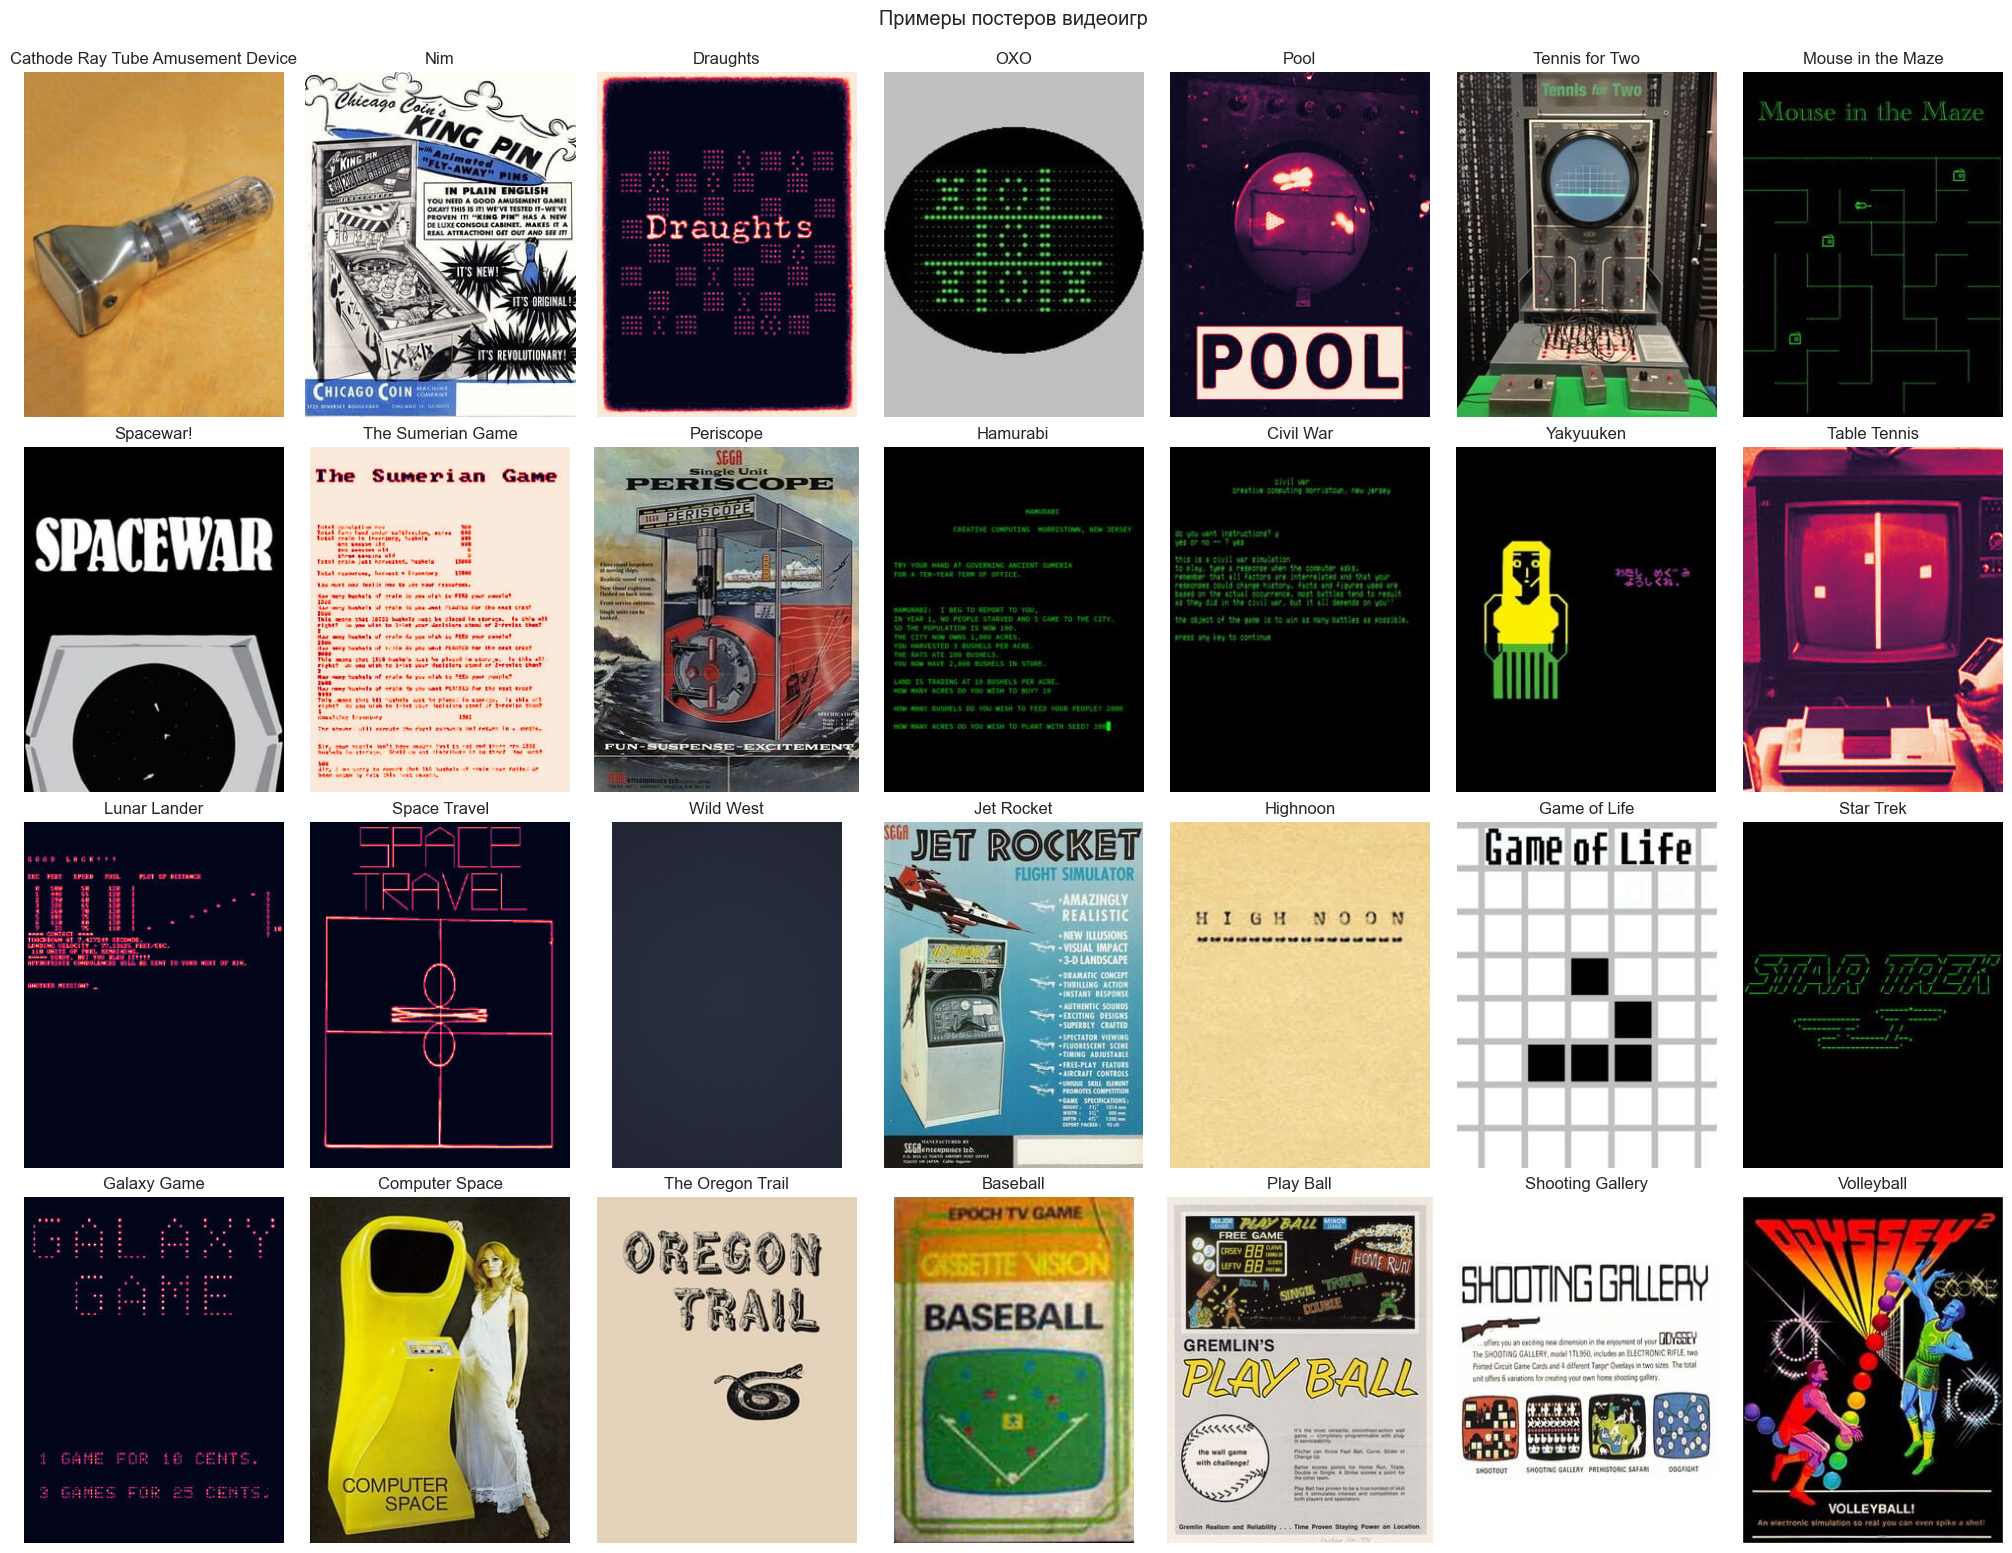

In [68]:
figure = plt.figure(
    layout='constrained',
    figsize=(20, 15)
)

grid = GridSpec(
    figure=figure,
    nrows=4,
    ncols=7,
    hspace=0.025,
    wspace=0.05,
)

figure.suptitle(
    t='Примеры постеров видеоигр',
    y=1.025,
    fontsize='x-large'
)

for i in range(4):
    for j in range(7):
        figure.add_subplot(grid[i, j])

data = posters.head(28)

for i, path in enumerate(data):
    key = int(path.split('.')[0])
    name = df['games'].loc[df['games']['id'] == key, 'name'].iloc[0]
    
    figure.axes[i].set_title(
        label=name,
        fontsize='large',
        y=1.0
    )
    
    with cbook.get_sample_data(f'{PATH_RAW_DATA}/{folder}/posters/{path}') as file:
        image = plt.imread(file)
        figure.axes[i].imshow(image)
        
for i in range(28):
    figure.axes[i].set_xticks([])
    figure.axes[i].set_yticks([])
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

## Выводы по предварительной обработке данных
***

1. Названия полей оставлены **без изменений**.
2. Целостность данных **не нарушена** (для каждой записи имеется первичный ключ).
3. Удалено менее **10** явных дубликатов.
4. Изменена структура данных:
    - добавлено логическое поле **indie**;
    - удалено значение **indie** из поля **genres**;
    - уточнено поле **rating** на основе данных **scores**;
    - добавлено поле **votes**.
5. Удалено менее **1000** (**0.80%**) записей с отсутствующими значениями в полях **name**, **reviews**, **plays**, **playing**, **backlogs** и **wishlists**.
6. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**.
7. **Удалены записи** (неявные дубликаты), дублирующие значения в полях **name** и **date** - более **30 тыс.** (**17.50%**).
8. Более **4000** (**19.75%**) постеров не имеют информации о видеоигре (в связи удалением неявных дубликатов). Более **4000** (**19.75%**) видеоигр не имеют постера.

# Разведочный анализ данных

## Анализ даты выпуска видеоигр

In [69]:
def distribution(title: str, ylabel: str, data: pd.DataFrame, x: str, y: str, hue: str | None = None ):
    figure = plt.figure(
        layout="constrained",
        figsize=(20, 5)
    )
    
    figure.suptitle(
        t=title, 
        y=1.05, 
        fontsize='x-large'
    )
    
    figure.add_subplot()

    if not hue:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'linewidth': 2.0,
            'marker': 'o',
            'markersize': 8,
            'ax': figure.axes[0],
            'color': sns.color_palette('hls', 15)[8]
        }
    else:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'hue': hue,
            'style': hue,
            'linewidth': 2.0,
            'markers': True,
            'dashes': False,
            'markersize': 8,
            'ax': figure.axes[0],
            'palette': sns.color_palette('hls', 15)[8::5]
        }
        
    sns.lineplot(**kwargs)
    
    figure.axes[0].set_xlabel('Года выпуска')
    figure.axes[0].set_ylabel(ylabel)
    figure.axes[0].set_xticks(
        ticks=data[x], 
        labels=data[x].map(str),
        rotation=45
    )
    s, maximum = plot.step(plot_data[y].max())
    figure.axes[0].set_yticks(np.arange(0, maximum + 1, s))
    figure.axes[0].set_xbound(
        lower=plot_data[x].min() - 0.2, 
        upper=plot_data[x].max() + 0.2
    )

    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[0].spines[s].set_visible(False)

    if hue:
        figure.axes[0].legend(
            title='Тип разрабочика видеоигр', 
            loc='upper left', 
            alignment='left'
        )

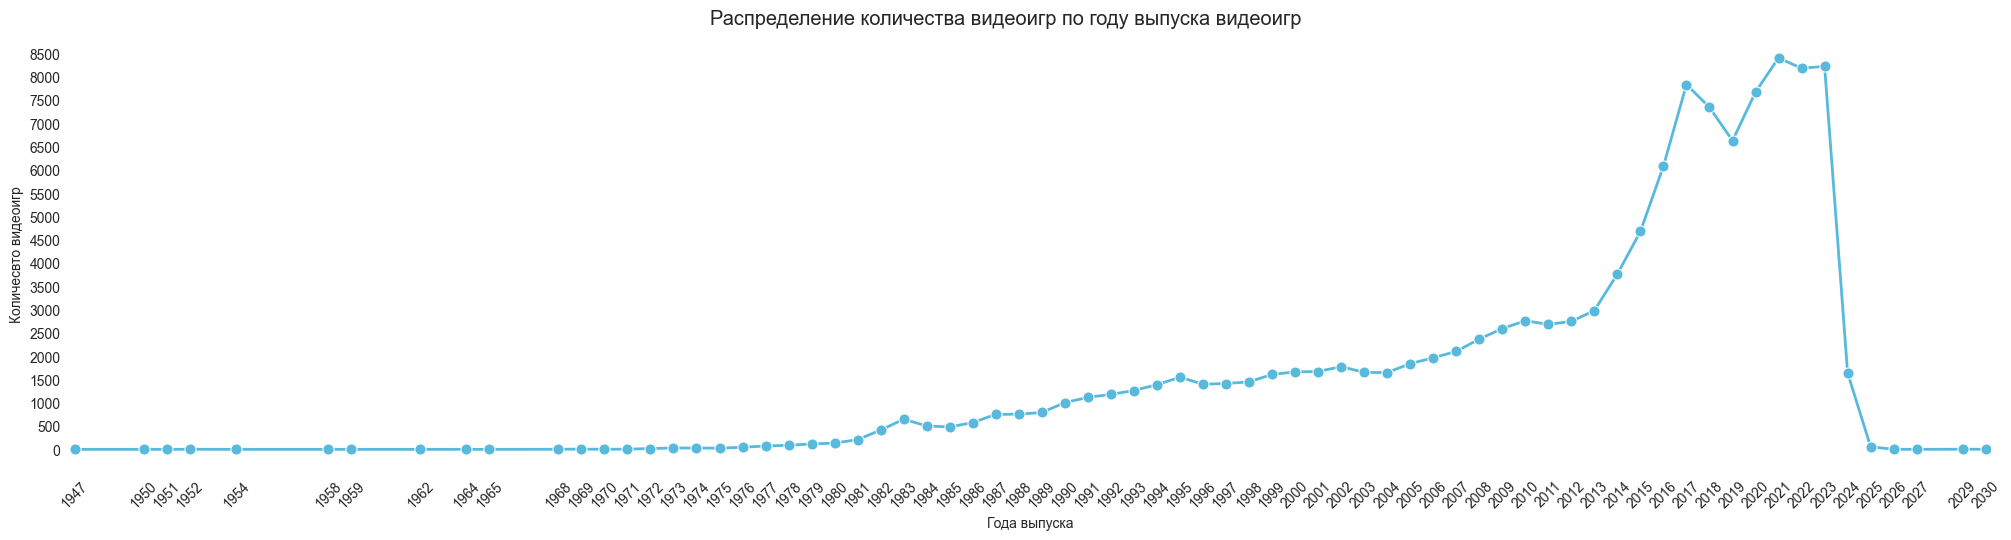

In [70]:
plot_data = (df['games'].loc[df['games']['date'].notna(), 'date']
             .dt
             .year
             .value_counts()
             .sort_index()
             .reset_index())

distribution(
    title=('Распределение количества видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Количесвто видеоигр',
    data=plot_data,
    x='date',
    y='count'
)

Самая **первая видеоигра** была выпущена в **1947** году. **Резкий подъем** количества выпущенных видеоигр начинается в **2013** году и достигает свого **пика** в **2021** году (приблизительно **8500** видеоигр).

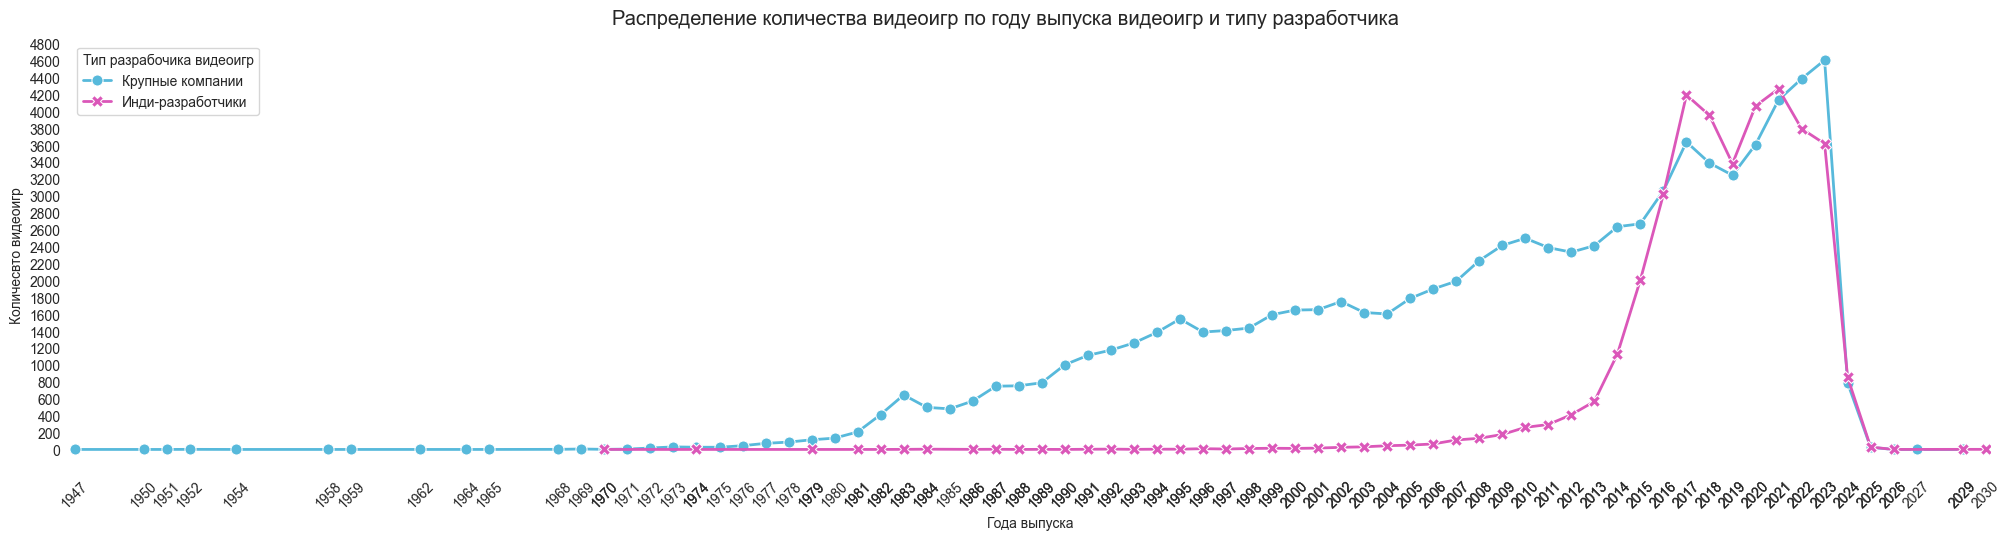

In [71]:
plot_data = (pd.DataFrame(
    data={
        'date': df['games'].loc[df['games']['date'].notna(), 'date'].dt.year,
        'indie': df['games'].loc[df['games']['date'].notna(), 'indie']
    }
)
             .groupby('date')
             .value_counts()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

distribution(
    title=('Распределение количества видеоигр '
           'по году выпуска видеоигр и типу разработчика'),
    ylabel='Количесвто видеоигр',
    data=plot_data,
    x='date',
    y='count',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то самая **первая видеоигра крупной компанией** была выпущена в **1947** году, а **инди-разаботчиком** в **1970**. **Резкого подъема** количества выпущенных видеоигр **крупными компаниями** не наблюдается, а выпуск видеоигр **инди-разработчиками** начал активноый рост в **2013** году. Наибольшее количество видеоигр было выпущено **крупными компаниями** в **2023** году (приблизительно **4500** видеоигр), **инди-разработчиками** в **2021** (приблизительно **4200** видеоигр). С **2016** по **2021** год количество выпущенных видеоигр **инди-разработчиками** превышало количество выпущенных видеоигр **крупными компаниями**.

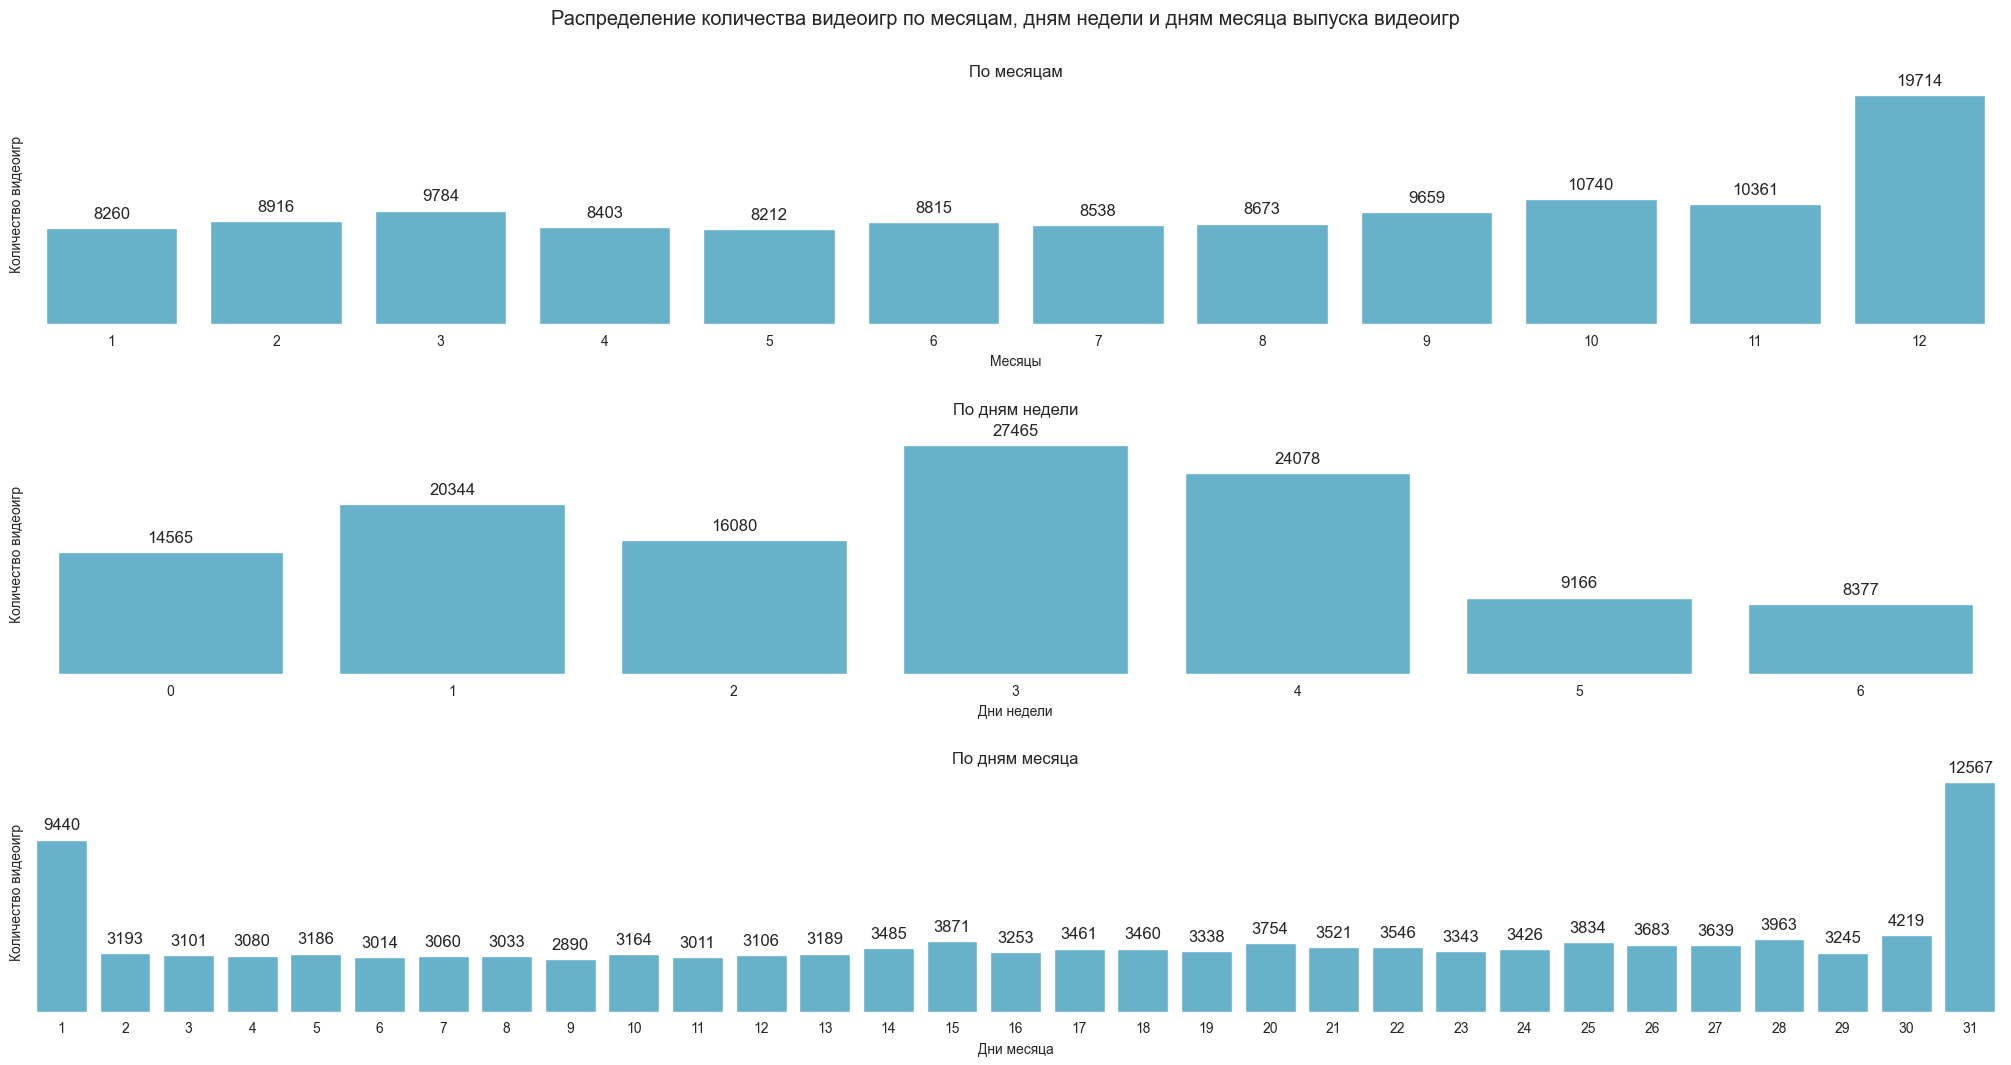

In [72]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t=('Распределение количества видеоигр '
       'по месяцам, дням недели и дням месяца выпуска видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=3, 
    ncols=1, 
    hspace=0.1
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (df['games'].loc[df['games']['date'].notna(), 'date']
             .dt.month
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count', 
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='По месяцам',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Месяцы')
figure.axes[0].set_ylabel('Количество видеоигр')
figure.axes[0].set_yticks([])
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['games'].loc[df['games']['date'].notna(), 'date']
             .dt.weekday
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[1].set_title(
    label='По дням недели',
    y=1.05,
    fontsize='large'
)
figure.axes[1].set_xlabel('Дни недели')
figure.axes[1].set_ylabel('Количество видеоигр')
figure.axes[1].set_yticks([])
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['games'].loc[df['games']['date'].notna(), 'date']
             .dt.day
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[2], 
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[2].set_title(
    label='По дням месяца',
    y=1,
    fontsize='large'
)
figure.axes[2].set_xlabel('Дни месяца')
figure.axes[2].set_ylabel('Количество видеоигр')
figure.axes[2].set_yticks([])
figure.axes[2].bar_label(
    container=figure.axes[2].containers[0], 
    fontsize=12, 
    padding=5
)

for ax in range(3):
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[ax].spines[s].set_visible(False)

Наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа.

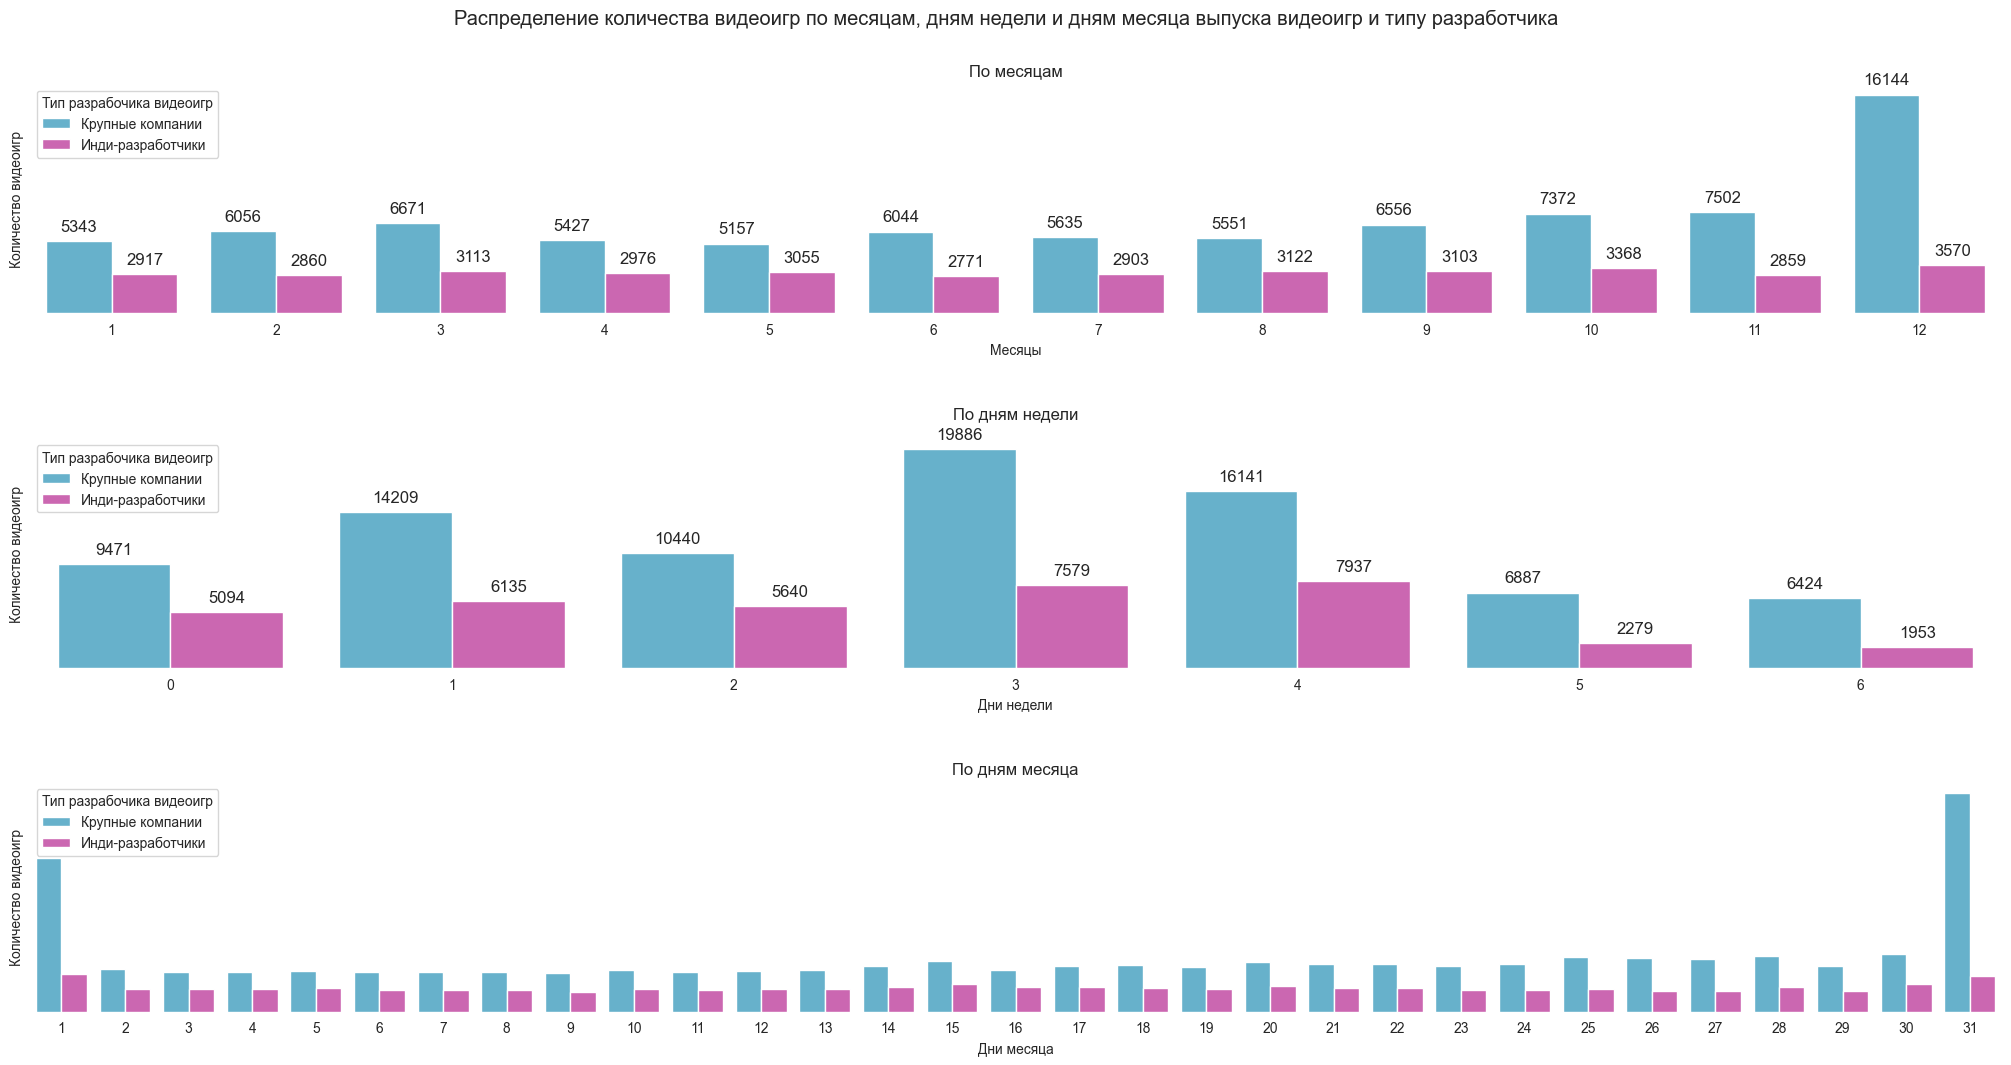

In [73]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t=('Распределение количества видеоигр '
       'по месяцам, дням недели и дням месяца выпуска видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=3, 
    ncols=1, 
    hspace=0.15
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

data = df['games'].loc[df['games']['date'].notna(), :]

plot_data = (pd.DataFrame(
    data={
        'month': data['date'].dt.month,
        'indie': data['indie'],
        'count': data['name']}
    )
             .groupby(['month', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='month', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[0], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[0].set_title(
    label='По месяцам',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Месяцы')
figure.axes[0].set_ylabel('Количество видеоигр')
figure.axes[0].set_yticks([])
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[1], 
    fontsize=12, 
    padding=5
)
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
)

plot_data = (pd.DataFrame(
    data={
        'weekday': data['date'].dt.weekday,
        'indie': data['indie'],
        'count': data['name']}
    )
             .groupby(['weekday', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='weekday', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[1], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[1].set_title(
    label='По дням недели',
    y=1.05,
    fontsize='large'
)
figure.axes[1].set_xlabel('Дни недели')
figure.axes[1].set_ylabel('Количество видеоигр')
figure.axes[1].set_yticks([])
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[1], 
    fontsize=12, 
    padding=5
)
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
)

plot_data = (pd.DataFrame(
    data={
        'day': data['date'].dt.day,
        'indie': data['indie'],
        'count': data['name']}
    )
             .groupby(['day', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='day', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[2], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[2].set_title(
    label='По дням месяца',
    y=1,
    fontsize='large'
)
figure.axes[2].set_xlabel('Дни месяца')
figure.axes[2].set_ylabel('Количество видеоигр')
figure.axes[2].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[2].spines[s].set_visible(False)
figure.axes[2].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для **крупных компаний** закономерность остается прежней, наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа. Для **инди-разрабочиков** количество выпущенных видеоигр **распределено равномерно** между месяцами и дням месяца. Вероятнее всего, в **крупных компаниях** дата выпуска видеоигр **планируется заранее**.

In [74]:
def matrix(data: pd.DataFrame, title: str, xlabel: str, ylabel: str):
    figure = plt.figure(
        layout="constrained",
        figsize=(20, 7.5)
    )

    figure.suptitle(
        t=title, 
        y=1.05, 
        fontsize='x-large'
    )
    
    grid = GridSpec(
        figure=figure,
        nrows=1, 
        ncols=2, 
        wspace=0.01,
        width_ratios=[1, 0.025]
    )
    
    figure.add_subplot(grid[0, 0])
    figure.add_subplot(grid[0, 1])
    
    s, maximum = plot.step(plot_data.max().max())
    
    sns.heatmap(
        data=data,
        linewidths=1.0,
        cmap=sns.color_palette("light:#57b9db", as_cmap=True),
        ax=figure.axes[0],
        cbar_ax=figure.axes[1],
        cbar_kws={'ticklocation': 'left'},
        vmin=0,
        vmax=maximum
    )
    
    
    figure.axes[1].set_yticks(np.arange(0, maximum + 1, s))
    figure.axes[0].set_xlabel(xlabel)
    figure.axes[0].set_ylabel(ylabel)
    figure.axes[0].tick_params(axis='x', labelrotation=45.0)

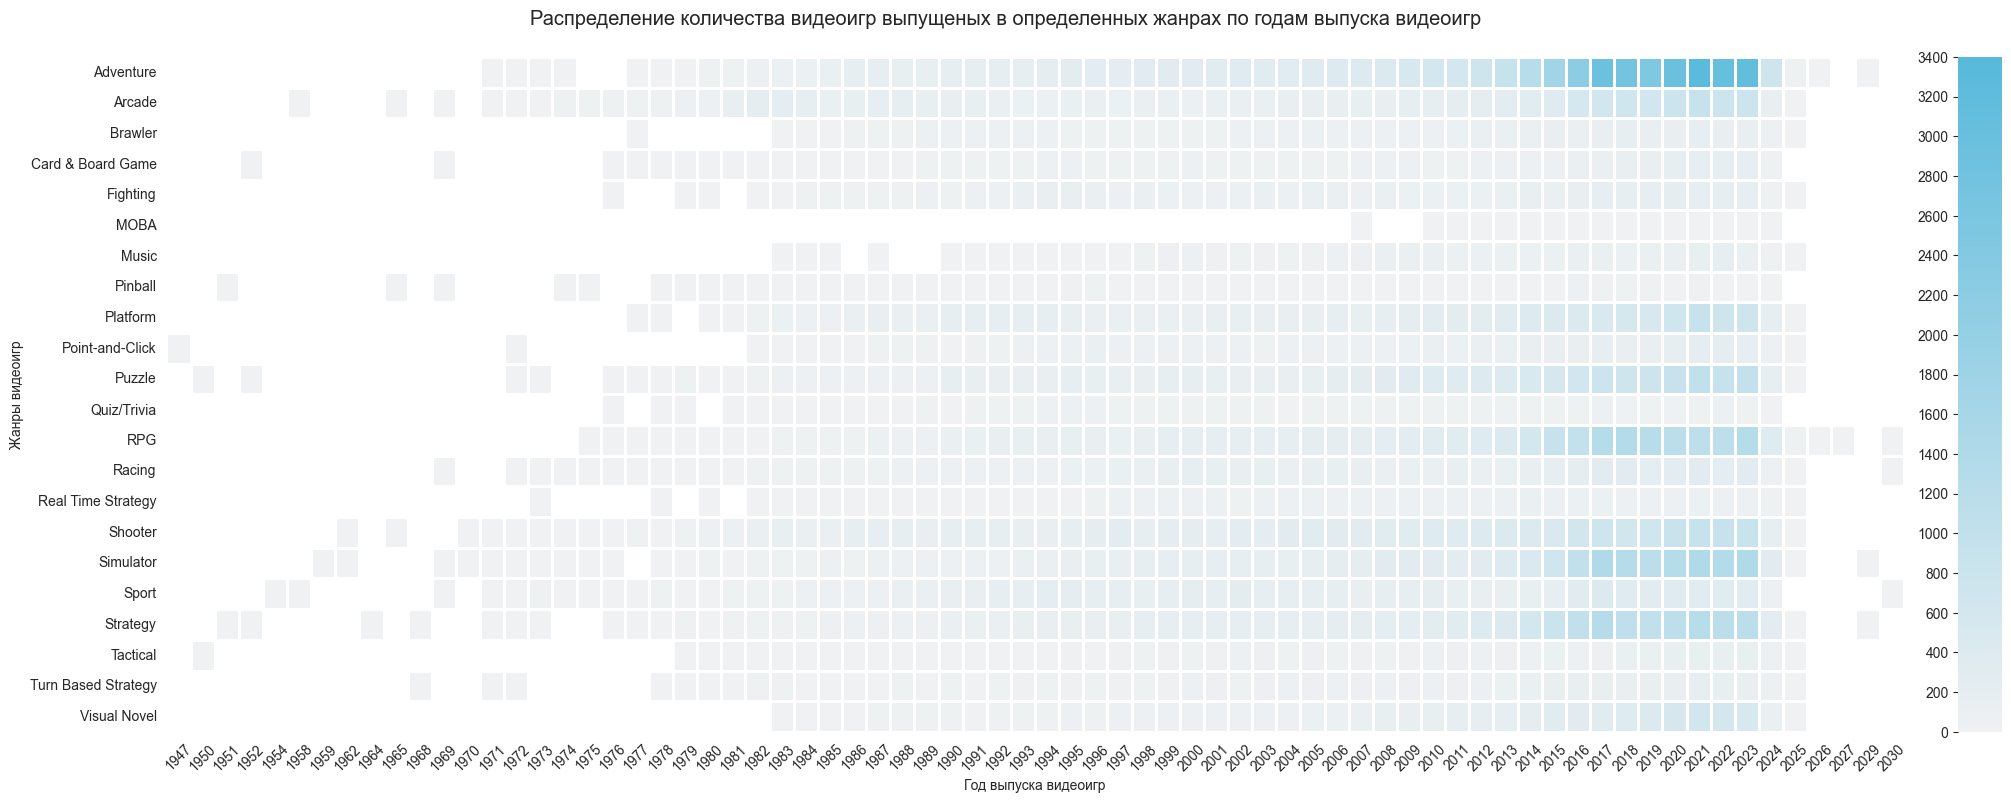

In [75]:
plot_data = (df['genres']
             .join(df['games'][['id', 'date']].set_index('id'), on='id'))[['genre', 'date']]
plot_data = plot_data.loc[plot_data['date'].notna(), :]
plot_data['date'] = plot_data['date'].dt.year
plot_data = (plot_data
             .groupby('date')['genre']
             .value_counts()
             .unstack()
             .T)

matrix(
    data=plot_data,
    title=('Распределение количества видеоигр '
           'выпущеных в определенных жанрах '
           'по годам выпуска видеоигр'),
    xlabel='Год выпуска видеоигр',
    ylabel='Жанры видеоигр'
)

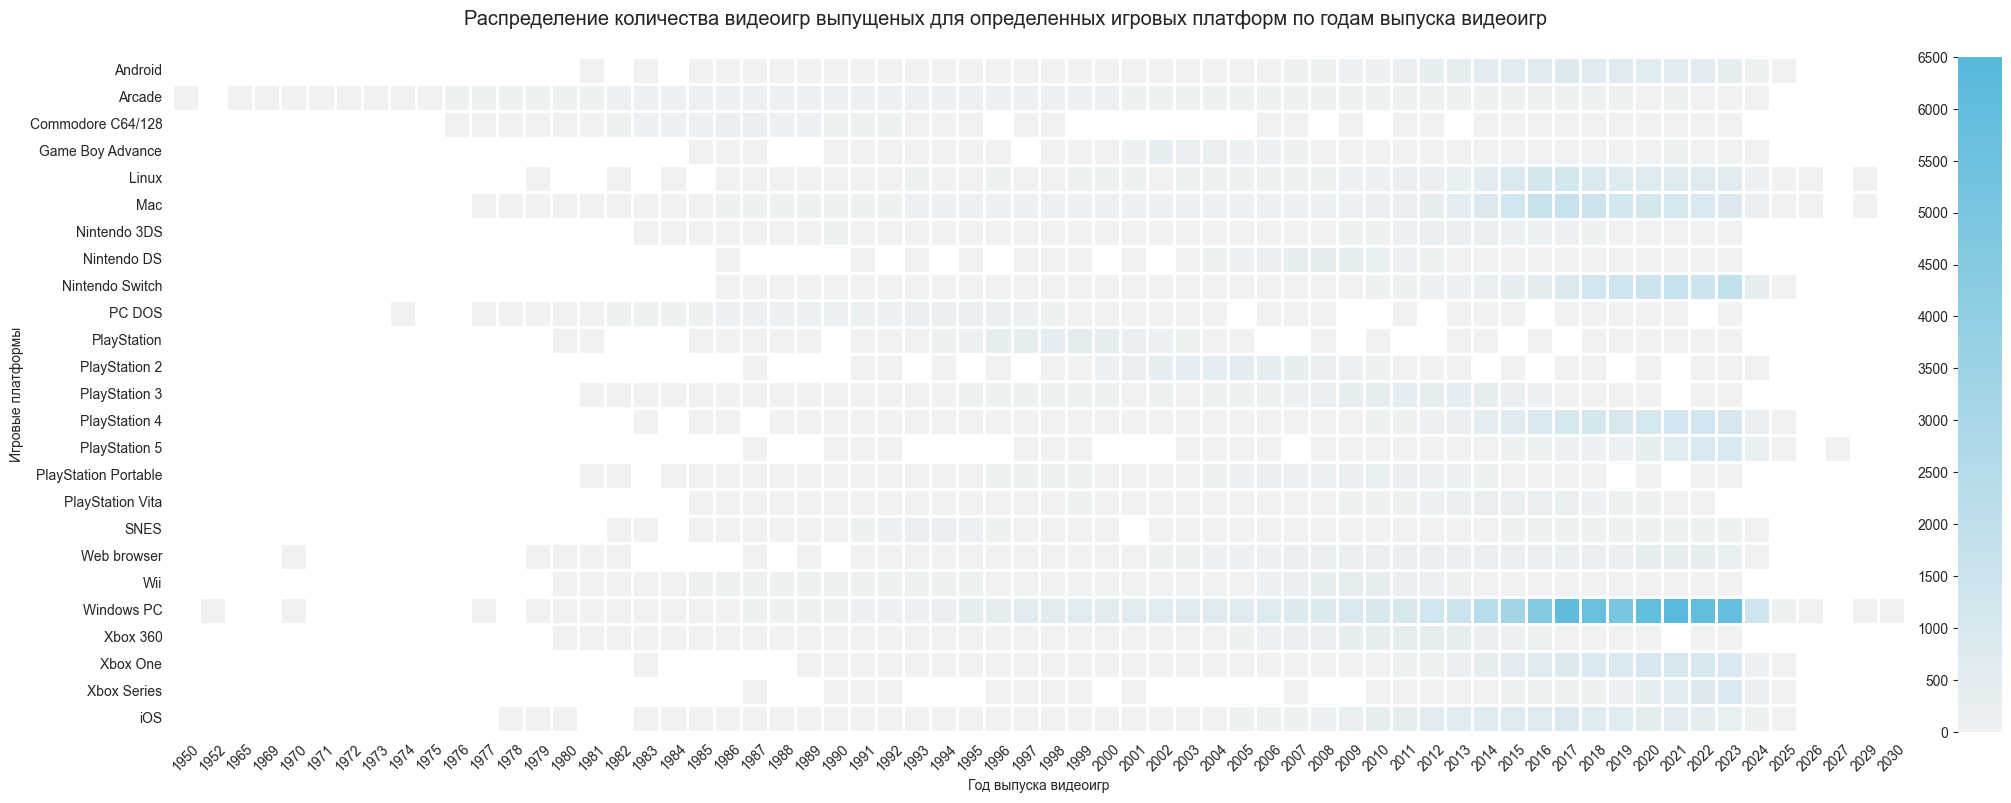

In [76]:
platforms = df['platforms']['platform'].value_counts()[:25].index
plot_data = (df['platforms'][df['platforms']['platform'].isin(platforms)]
             .join(df['games'][['id', 'date']].set_index('id'), on='id'))[['platform', 'date']]
plot_data = plot_data.loc[plot_data['date'].notna(), :]
plot_data['date'] = plot_data['date'].dt.year
plot_data = (plot_data
             .groupby('date')['platform']
             .value_counts()
             .unstack()
             .T)

matrix(
    data=plot_data,
    title=('Распределение количества видеоигр '
           'выпущеных для определенных игровых платформ '
           'по годам выпуска видеоигр'),
    xlabel='Год выпуска видеоигр',
    ylabel='Игровые платформы'
)

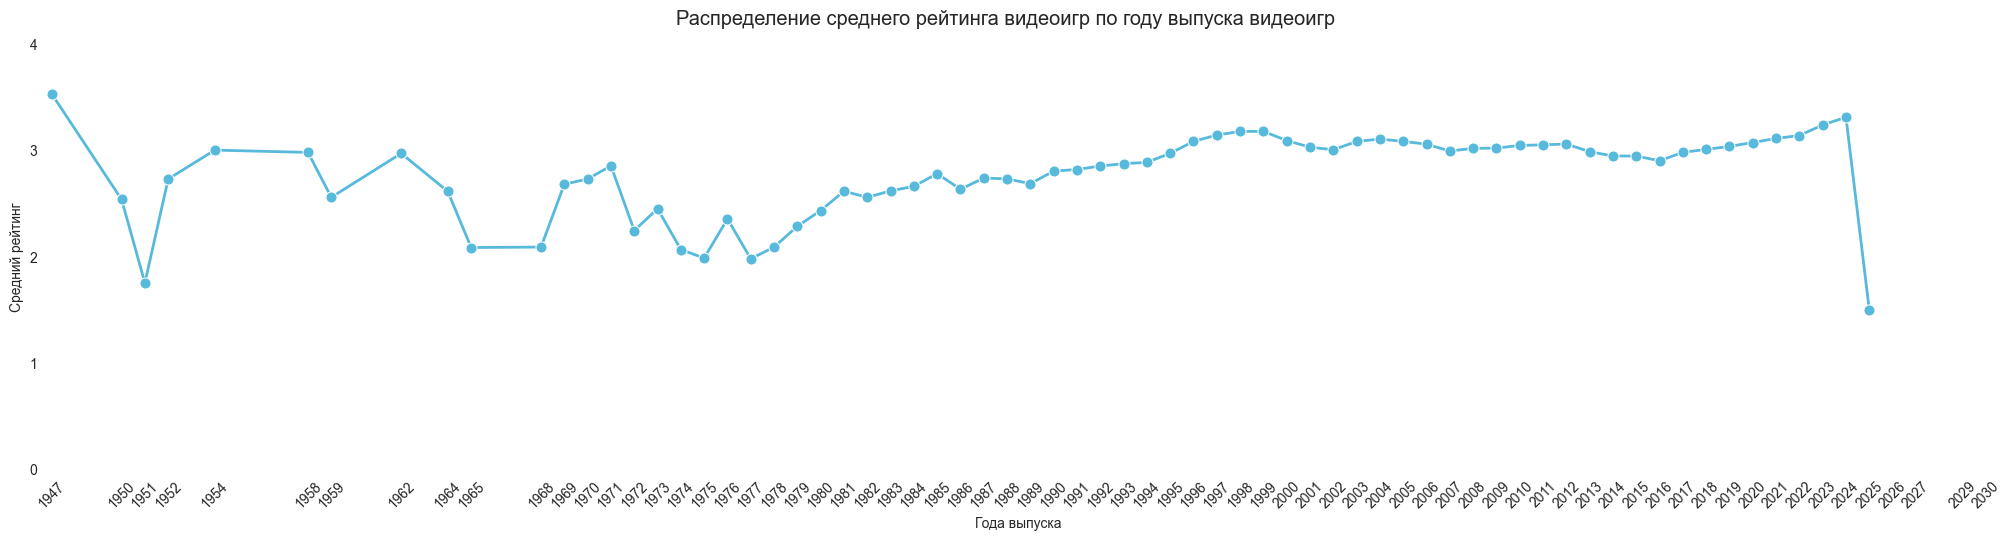

In [77]:
plot_data = (pd.DataFrame(
    data={
        'date': df['games'].loc[df['games']['date'].notna(), 'date'].dt.year,
        'rating': df['games'].loc[df['games']['date'].notna(), 'rating']
    }
)
             .groupby('date')
             .mean()['rating']
             .reset_index())

distribution(
    title=('Распределение среднего рейтинга видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Средний рейтинг',
    data=plot_data,
    x='date',
    y='rating',
)

**Средний ретинг** видеоигр распределен по годам выпуска видеоигр **равномерно** и равен приблизительно **3.0**,  за исключением периода с **1947** по **1985**, когда видеоигры выпускались в не таком большом количестве.

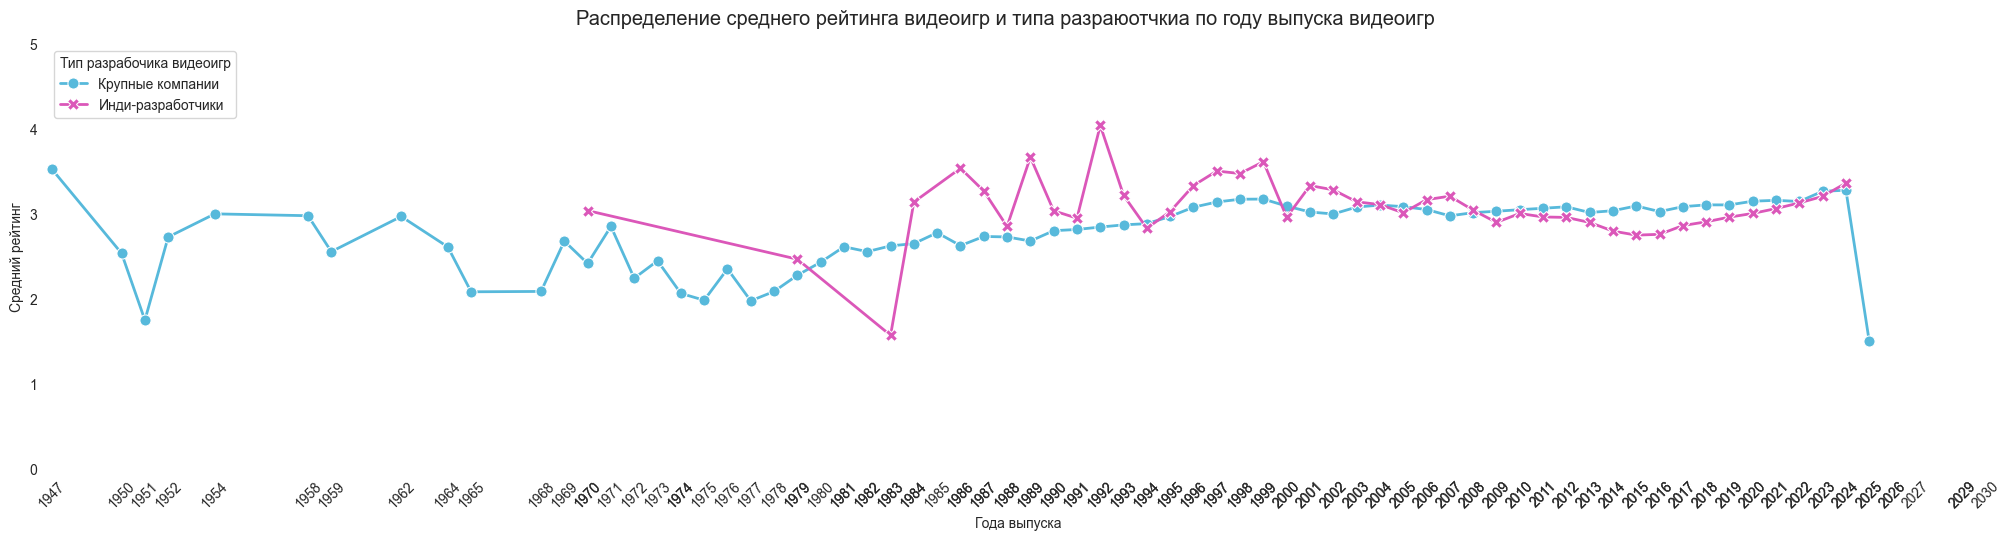

In [78]:
plot_data = ((pd.DataFrame(
    data={
        'date': df['games'].loc[df['games']['date'].notna(), 'date'].dt.year,
        'indie': df['games'].loc[df['games']['date'].notna(), 'indie'],
        'rating': df['games'].loc[df['games']['date'].notna(), 'rating']
    }
)
             .groupby(['date', 'indie'])
             .mean()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index()))

distribution(
    title=('Распределение среднего рейтинга видеоигр '
           'и типа разраюотчкиа по году выпуска видеоигр'),
    ylabel='Средний рейтинг',
    data=plot_data,
    x='date',
    y='rating',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то закономерность остается прежней, за исключением того, что в разные временные периоды, средний рейтинг видеоигр был больше у **крупных компаний** или **инди-разработчиков**.

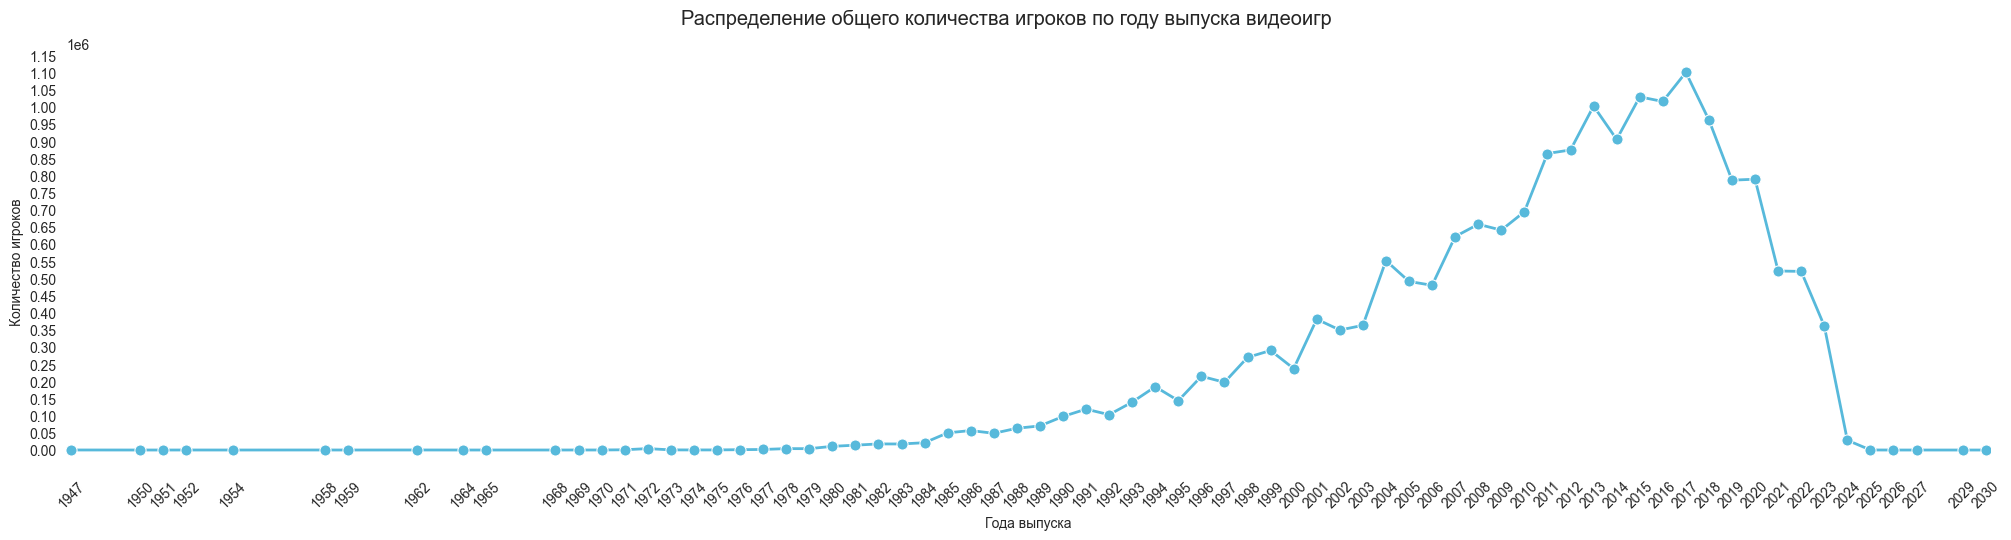

In [79]:
plot_data = (pd.DataFrame(
    data={
        'date': df['games'].loc[df['games']['date'].notna(), 'date'].dt.year,
        'plays': df['games'].loc[df['games']['date'].notna(), 'plays']
    }
)
             .groupby('date')
             .sum()['plays']
             .reset_index())

distribution(
    title=('Распределение общего количества игроков '
           'по году выпуска видеоигр'),
    ylabel='Количество игроков',
    data=plot_data,
    x='date',
    y='plays',
)

**Общее количество игроков**, игравших в видеоигры, **увеличивалось** вместе с годом выхода видеоигр и достигло **пика** в **2017** году (приблизительно **1.15 млн.** игроков), после чего, стало **снижаться** (в игры, вышедшие в **2022** году играло приблизительно **500 тыс.** игроков).

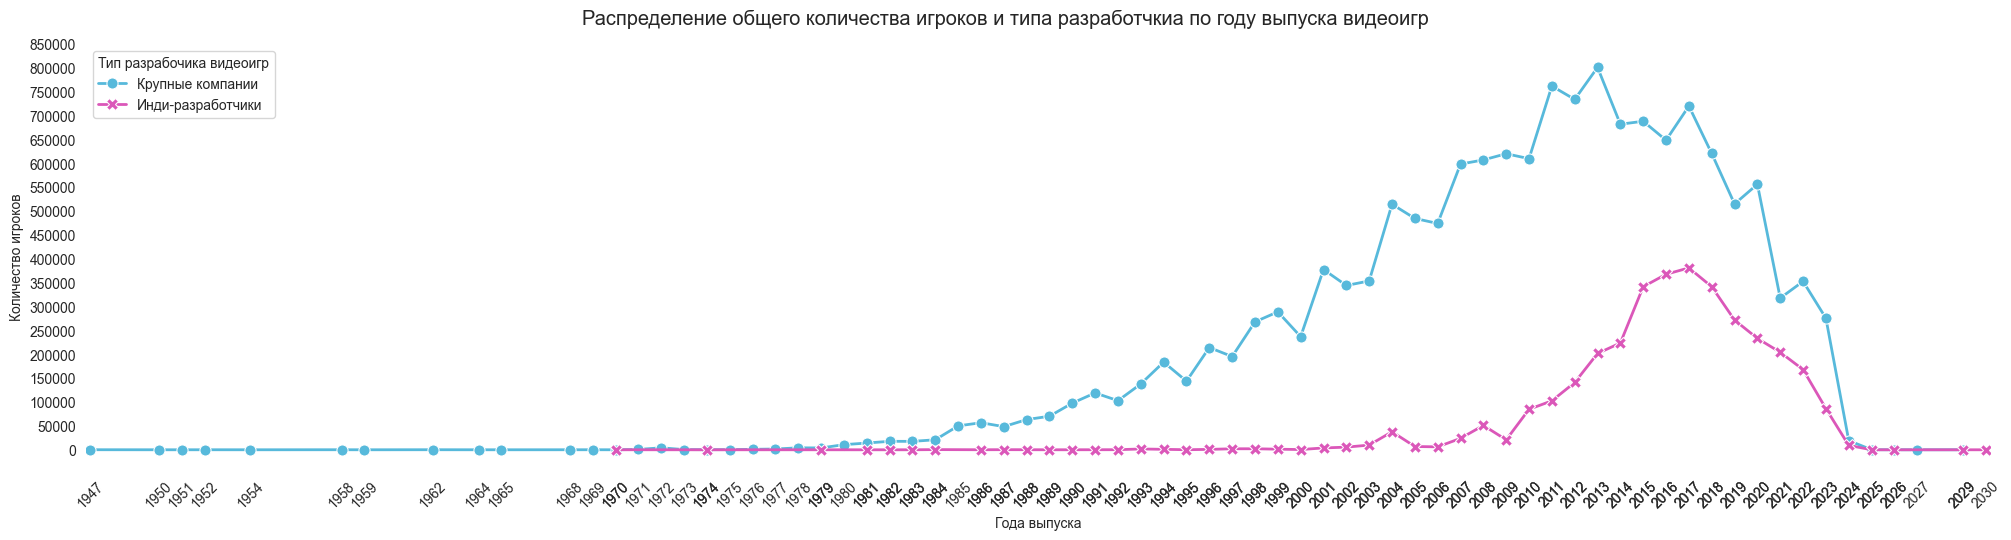

In [80]:
plot_data = ((pd.DataFrame(
    data={
        'date': df['games'].loc[df['games']['date'].notna(), 'date'].dt.year,
        'indie': df['games'].loc[df['games']['date'].notna(), 'indie'],
        'plays': df['games'].loc[df['games']['date'].notna(), 'plays']
    }
)
             .groupby(['date', 'indie'])
             .sum()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index()))

distribution(
    title=('Распределение общего количества игроков '
           'и типа разработчкиа по году выпуска видеоигр'),
    ylabel='Количество игроков',
    data=plot_data,
    x='date',
    y='plays',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то акивный рост общего количества игроков видеоигр, выпущенных **крупными компаниями** начался в **1985** году, а выпущенных **инди-разработчиками** в **2009**.

## Анализ числовых данных

Получим расширенную описательную статистику.

In [81]:
(df['games'].select_dtypes(['float32', 'int32'])
 .describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:.2f}'))

Удалим отрицательные значения в полях **plays**, **playing**, **backlogs** и **wishlists**.

In [82]:
columns = ['plays', 'playing', 'backlogs', 'wishlists']
ids = df['games'][(df['games'][columns] < 0).any(axis=1)]['id']
for name in df:
    df[name] = df[name][~df[name]['id'].isin(ids)]

In [83]:
(df['games'].select_dtypes(['float32', 'int32'])
 .describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:.2f}'))

Более **90%** видеоигр имеют:
- **рейтинг** - менее  **3.9**;
- **количество голосов** - менее **40**;
- **количество отзывов** - менее **5**;
- **общее количество игроков**, менее **70**;
- **количество игроков**, играющих в видеоигру в настоящий момент менее **5**;
- **количество игроков**, добавивших видеоигру в **backlog** или **wishlists** - менее **30**.

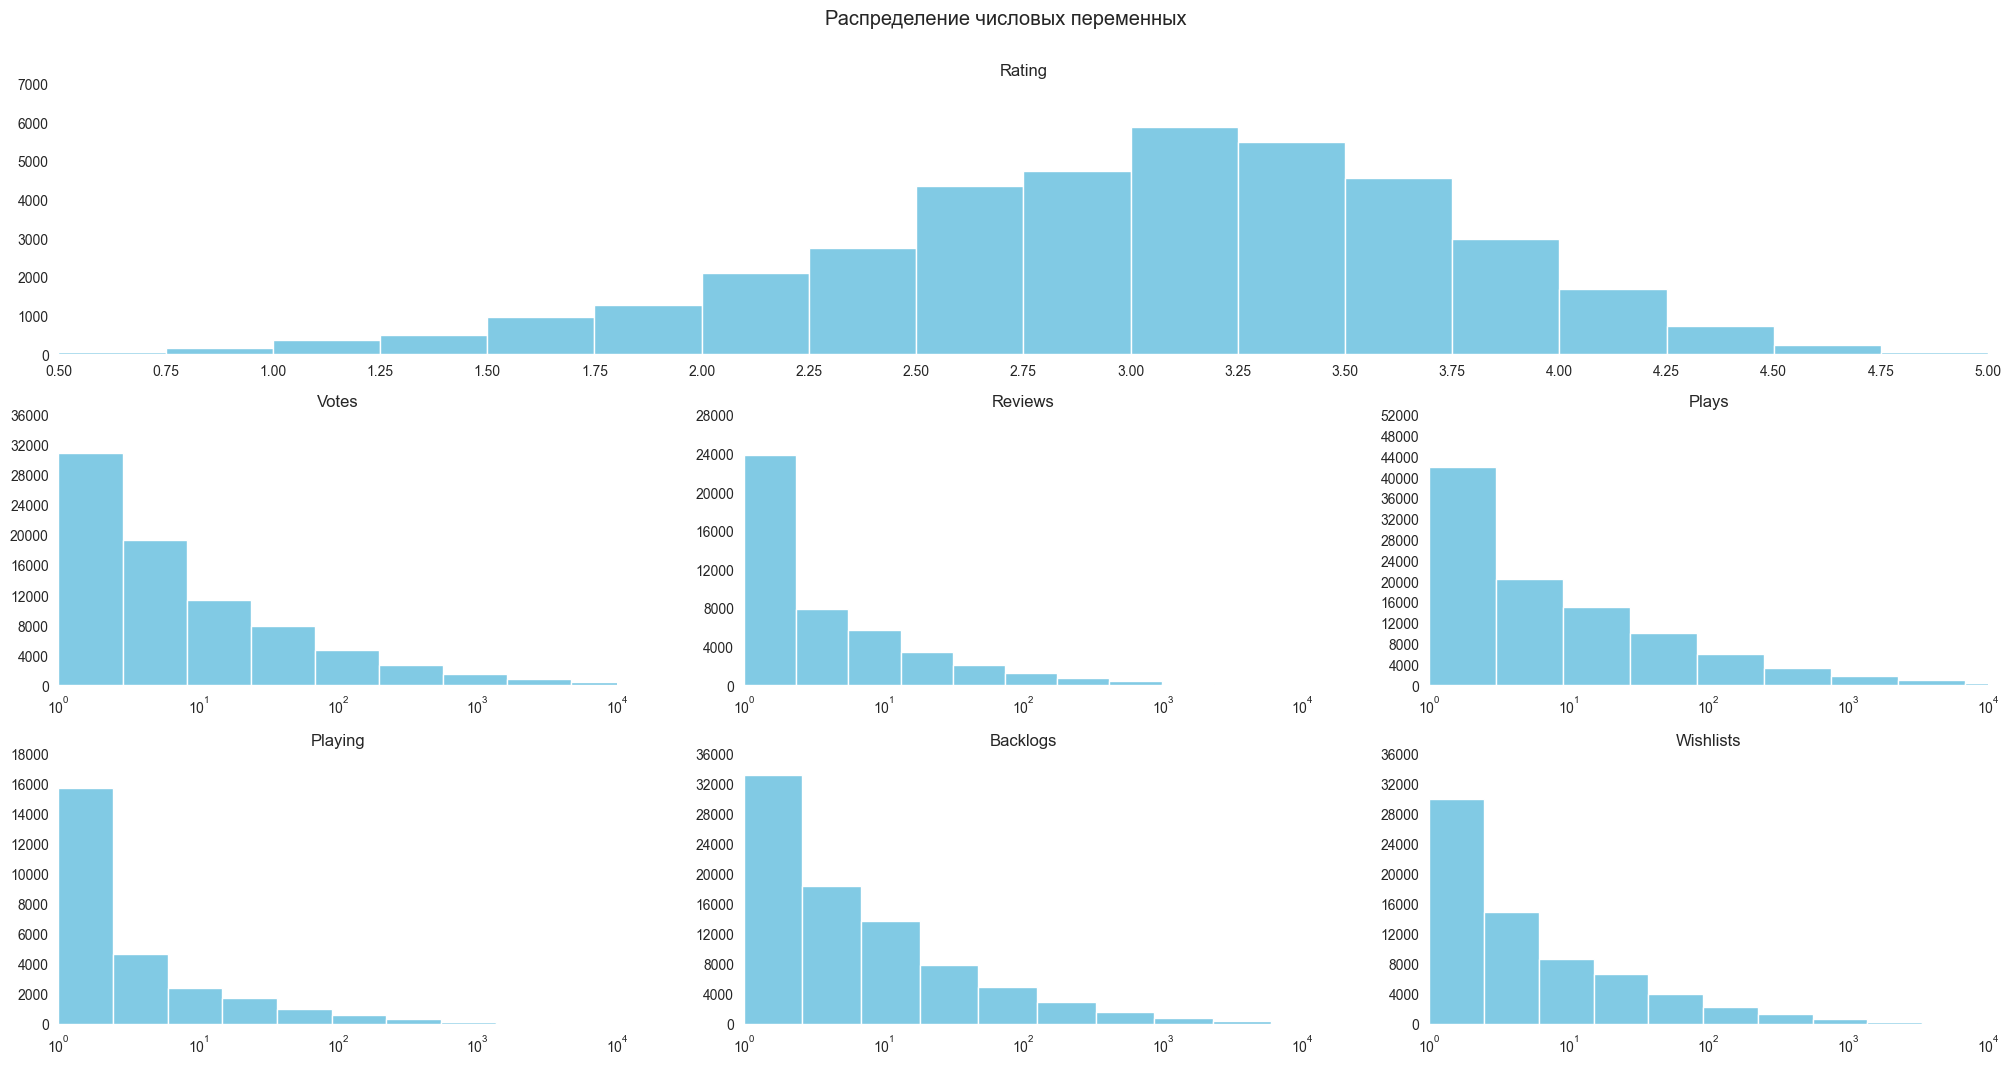

In [84]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 10)
)

figure.suptitle(
    t='Распределение числовых переменных',
    y=1.05,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=3, 
    ncols=3,  
    hspace=0.05, 
    wspace=0.05
)

figure.add_subplot(grid[0, :])
for i in range(1, 3):
    for j in range(3):
        figure.add_subplot(grid[i, j])

columns = df['games'].select_dtypes(['float32', 'int32']).columns

for i, column in enumerate(columns[1:]):
    bins = np.linspace(0., 5.0, 21) if not i else 10
    
    sns.histplot(
        x=df['games'][column], 
        ax=figure.axes[i], 
        bins=bins,
        log_scale=True if i else False,
        color=sns.color_palette('hls', 15)[8]
    )
        
    figure.axes[i].set_title(
        label=column.capitalize(),
        y=1,
        fontsize='large'
    )
    figure.axes[i].set_xlabel('')
    figure.axes[i].set_ylabel('')
    s, maximum = plot.step(figure.axes[i].get_yticks().max() - 1, 2)
    figure.axes[i].set_yticks(np.arange(0, maximum + 1, s))
    if i:
        figure.axes[i].set_xticks([10**x for x in range(5)])
        figure.axes[i].set_xbound(10**0, 10**4)
    else:
        figure.axes[0].set_xticks(np.linspace(0., 5.0, 21))
        figure.axes[0].set_xbound((0.5, 5.0))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

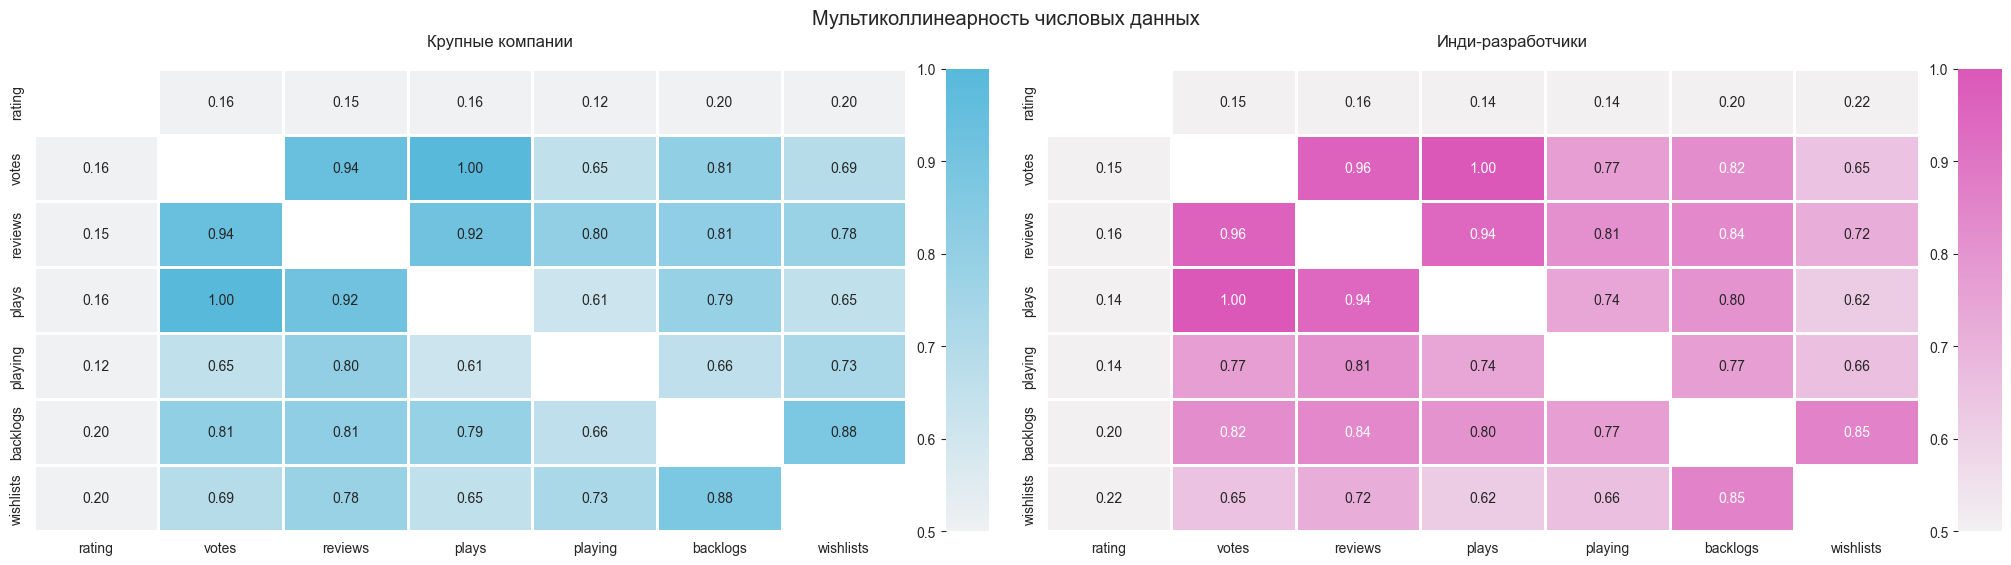

In [85]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Мультиколлинеарность числовых данных', 
    y=1.1, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    wspace=0.025
))

grid_1 = GridSpec(
    figure=subfigures[0],
    nrows=1,
    ncols=2,
    wspace=0.01,
    left=0,
    right=1,
    top=1,
    bottom=0,
    width_ratios=[1, 0.05]
)

grid_2 = GridSpec(
    figure=subfigures[1],
    nrows=1,
    ncols=2,
    wspace=0.01,
    left=0,
    right=1,
    top=1,
    bottom=0,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot(grid_1[0, 0])
subfigures[0].add_subplot(grid_1[0, 1])
subfigures[1].add_subplot(grid_2[0, 0])
subfigures[1].add_subplot(grid_2[0, 1])

columns = columns = df['games'].select_dtypes(['float32', 'int32']).columns[1:]

plot_data = (df['games']
             .loc[~df['games']['indie'].map(bool), columns]
             .corr())

subfigures[0].suptitle(
    t='Крупные компании',
    y=1.05,
    fontsize='large'
)   

sns.heatmap(
    data=plot_data,
    ax=subfigures[0].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.2f',
    mask = plot_data == 1,
    cmap=sns.color_palette("light:#57b9db", as_cmap=True),
    cbar_ax=subfigures[0].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.5,
    vmax=1.0
)

subfigures[0].axes[1].set_yticks(np.linspace(0.5, 1.0, 6))

plot_data = (df['games']
             .loc[df['games']['indie'].map(bool), columns]
             .corr())

subfigures[1].suptitle(
    t='Инди-разработчики',
    y=1.05,
    fontsize='large'
)

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.2f',
    mask = plot_data == 1,
    cmap=sns.color_palette("light:#db57b9", as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.5,
    vmax=1.0
)

subfigures[1].axes[1].set_yticks(np.linspace(0.5, 1.0, 6));

**Наибольшей** линейной зависимостью (коэфициент корреляции Пирсона) обладают:
- **plays** (**общее количество игроков**) и **votes** (**количество голосов**): 1.00;
- **reviews** (**количество отзывов**) и **votes** (**количество голосов**): 0.94;
- **plays** (**общее количество игроков**) и **reviews** (**количество отзывов**): 0.92;

**Наименьшей** линейной зависимостью обладает рейтинг видеоигр. Коэфициент корреляции Пирсона с другими полями не превосходит **0.20**.

### Анализ рейтинга видеоигр

Гистограмма показывает, что данные в полe **'rating'** подчиняются закону распределения, **близкому к нормальному**. Давайте подробнее рассмотрим, как распределяются данные в этом поле. Для этого построим несколько диаграмм.

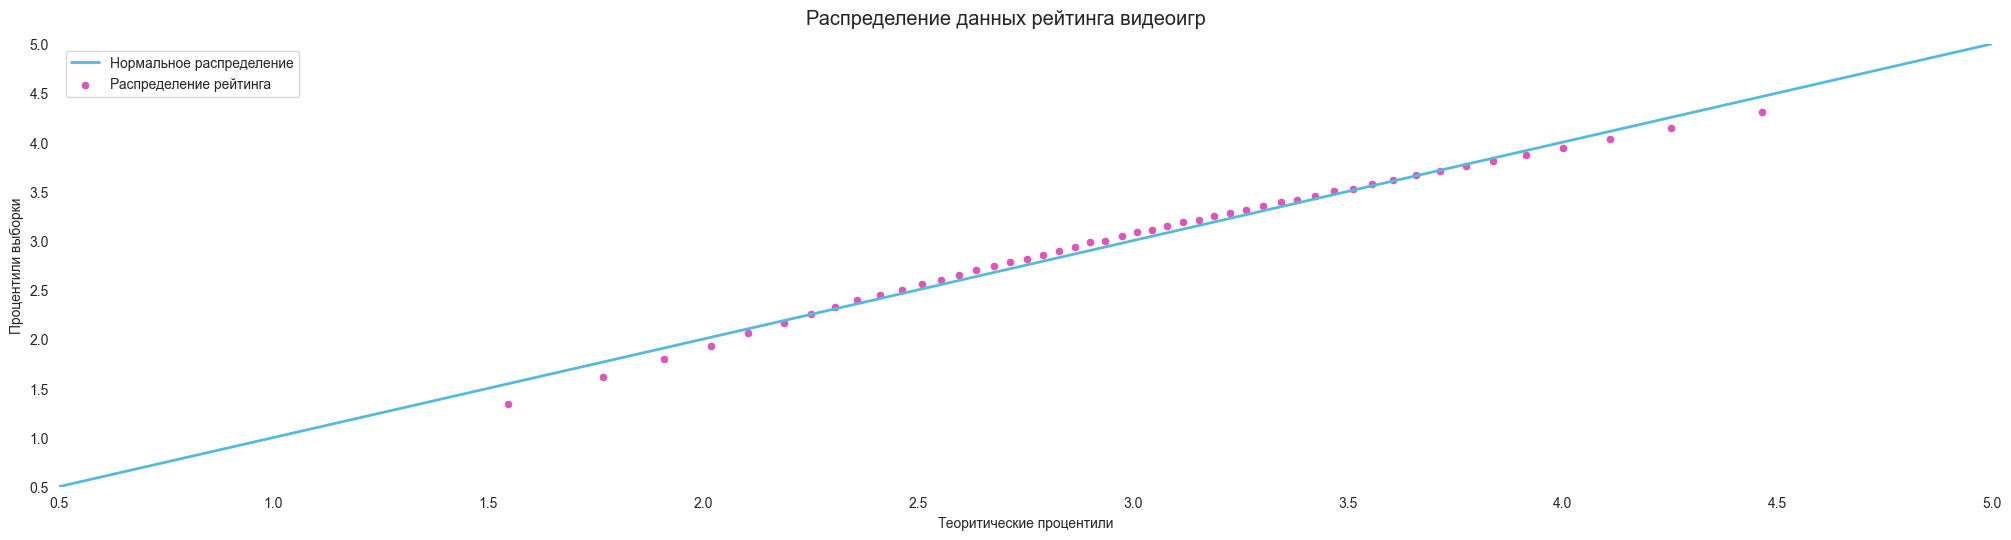

In [86]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Распределение данных рейтинга видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

rating_distribution = df['games'].loc[df['games']['rating'].notna(), 'rating']
normal_distribution = np.random.normal(
    loc=rating_distribution.mean(), 
    scale=rating_distribution.std(), 
    size=rating_distribution.size
)

percentiles = np.linspace(0, 100, 51)
rating = np.percentile(rating_distribution, percentiles)
normal = np.percentile(normal_distribution, percentiles)

sns.lineplot(
    x=normal, 
    y=normal,
    linewidth=2.0,
    ax=figure.axes[0], 
    label='Нормальное распределение', 
    color=sns.color_palette('hls', 15)[8]
)

sns.scatterplot(
    x=normal,
    y=rating,
    sizes=8,
    ax=figure.axes[0], 
    label='Распределение рейтинга', 
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[0].set_xlabel('Теоритические процентили')
figure.axes[0].set_ylabel('Процентили выборки')
figure.axes[0].set_xbound((0.5, 5.0))
figure.axes[0].set_ybound((0.5, 5.0))
figure.axes[0].set_xticks(np.linspace(0.5, 5.0, 10))
figure.axes[0].set_yticks(np.linspace(0.5, 5.0, 10))
for s in 'top', 'right', 'bottom', 'left':
        figure.axes[0].spines[s].set_visible(False)
figure.axes[0].legend(alignment='left');

**График Q-Q** (Квантиль-Квантильный график) позволяет оценить, насколько близко **распределение данных** к **нормальному распределению**. На этом графике видно, что распределение данных поля 'rating' **очень близко к нормальному**.

Посмотрим, как рейтинг коррелирует с другими числовыми переменными.

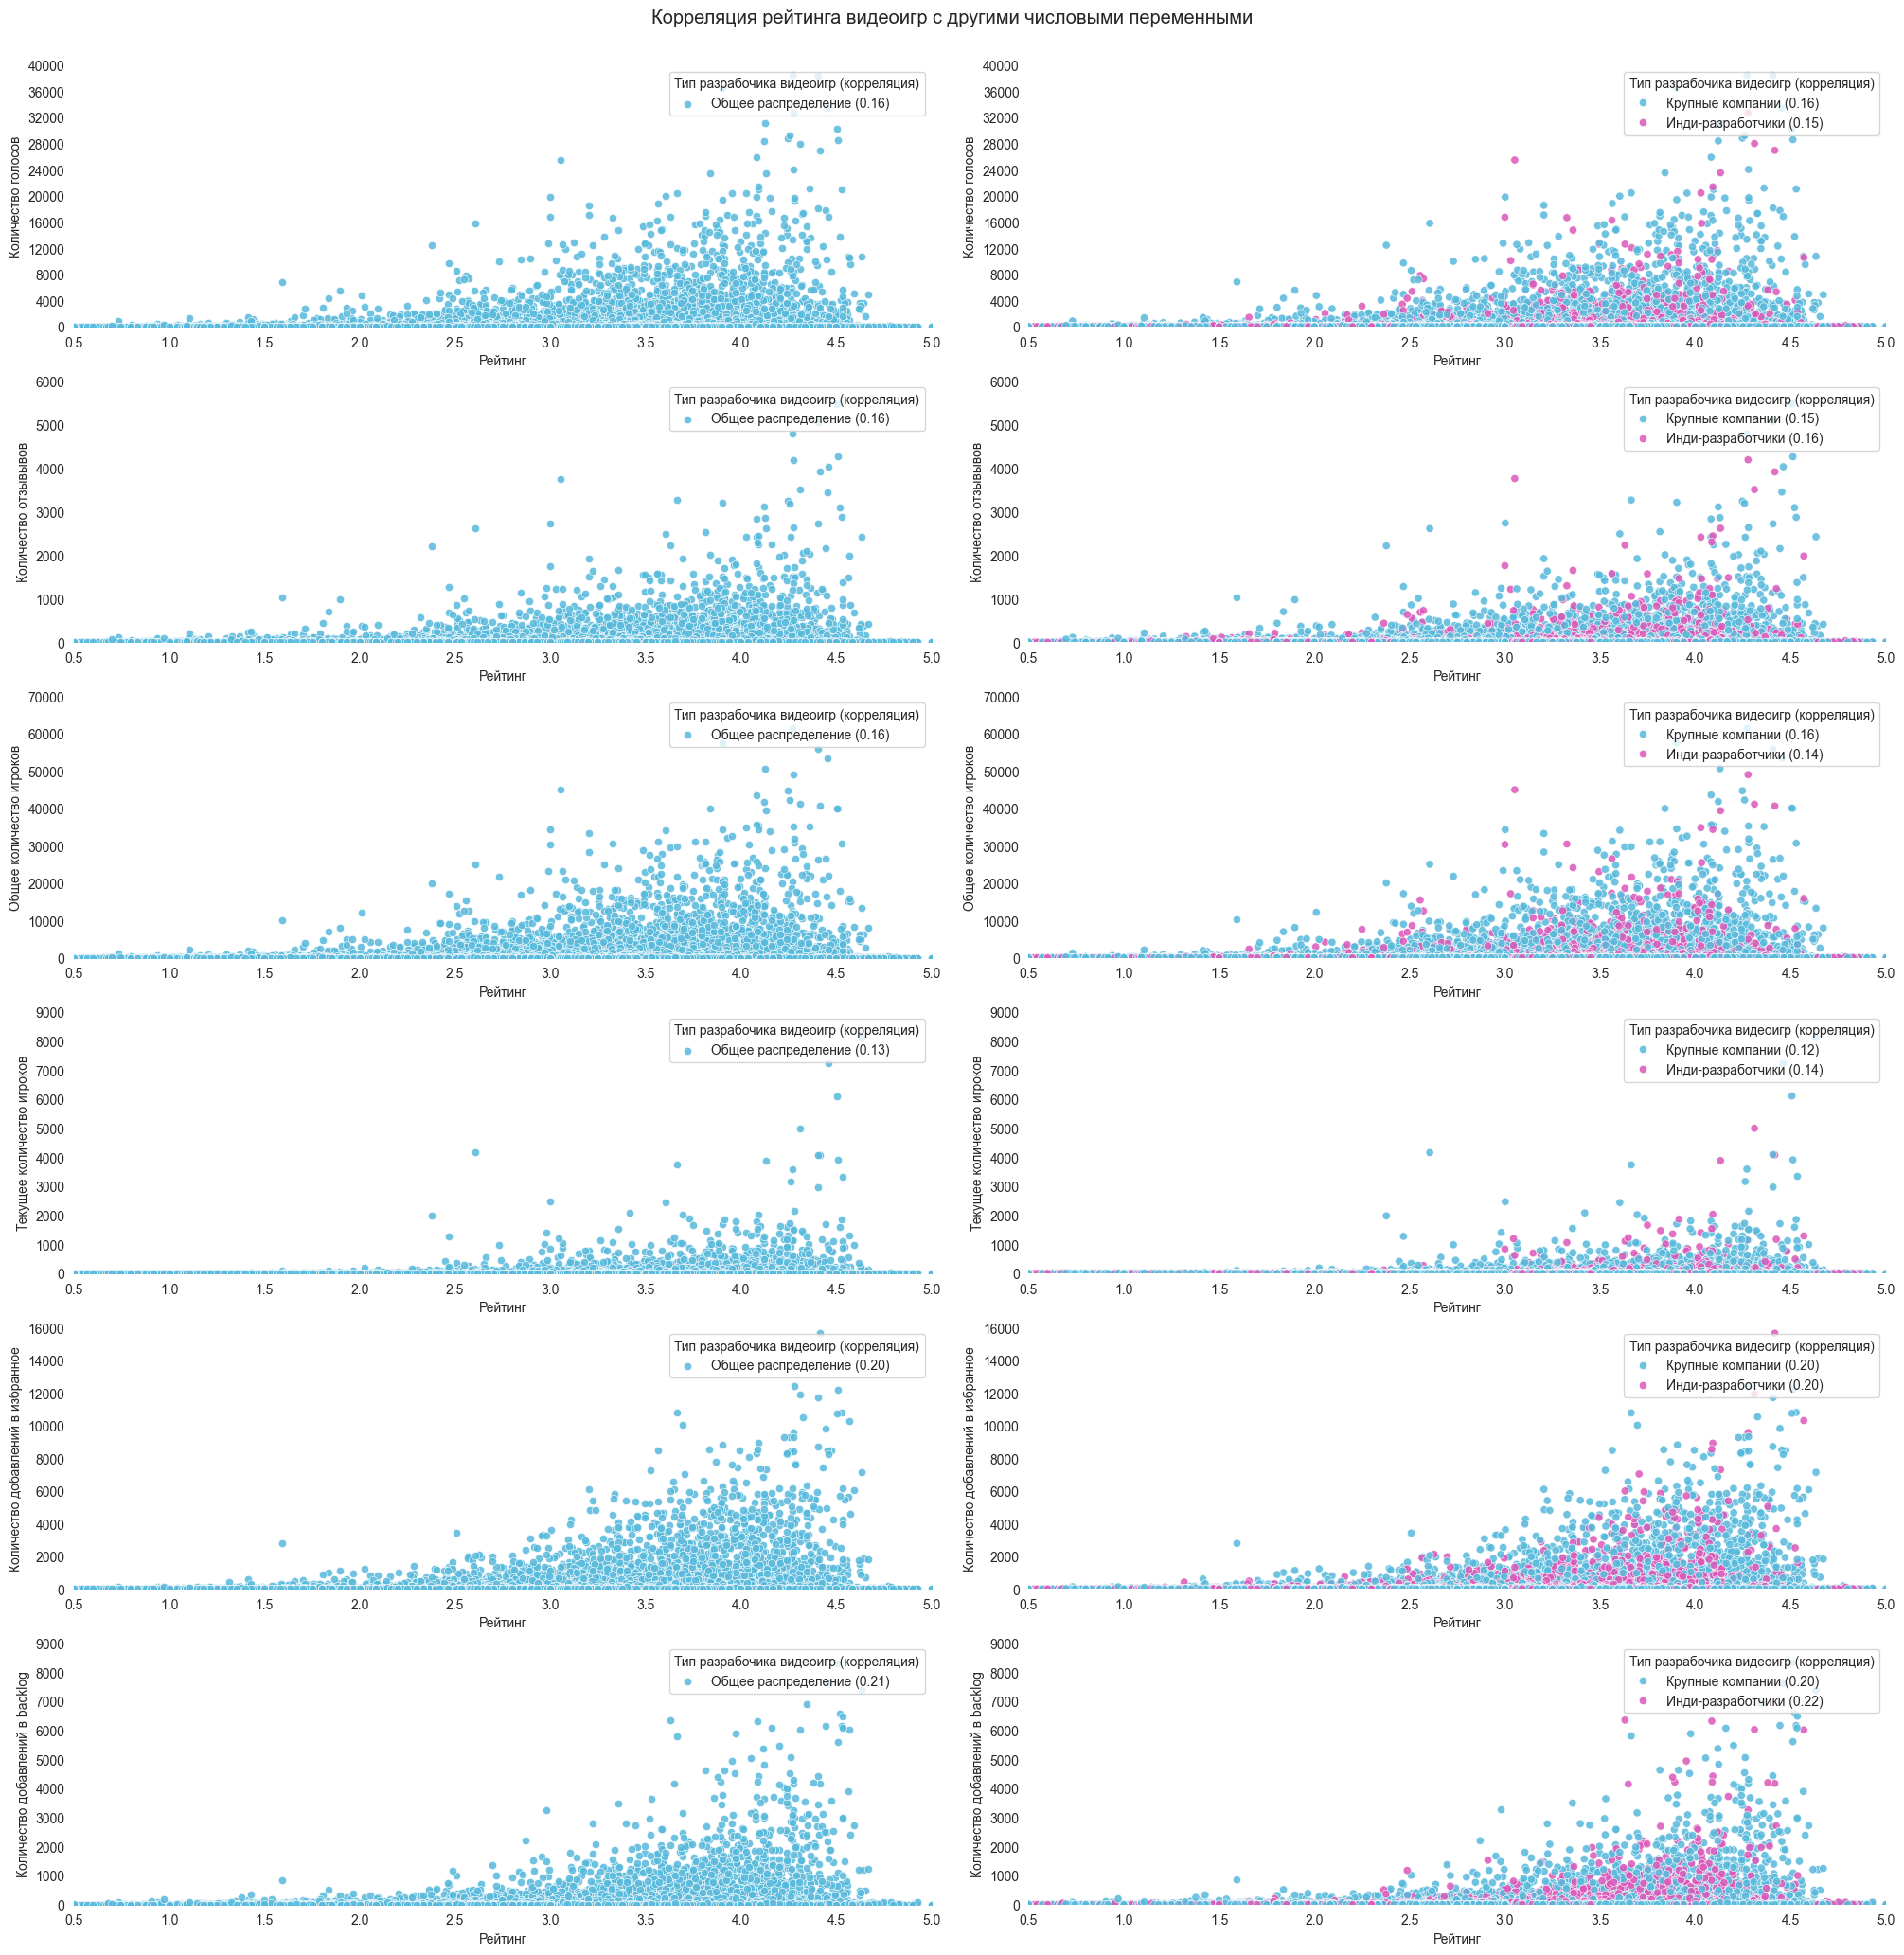

In [87]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 20)
)

figure.suptitle(
    t='Корреляция рейтинга видеоигр с другими числовыми переменными',
    y=1.025,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=6, 
    ncols=2,  
    hspace=0.025, 
    wspace=0.025
)

for i in range(6):
    for j in range(2):
        figure.add_subplot(grid[i, j])

columns = df['games'].select_dtypes(['int32']).columns[1:]

for i, column in zip(np.arange(0, 11, 2), columns):
    plot_data = df['games'][['rating', column, 'indie']]

    sns.scatterplot(
        data=plot_data,
        x='rating',
        y=column,
        alpha=0.85,
        sizes=8,
        ax=figure.axes[i],
        color=sns.color_palette('hls', 15)[8]
    )

    sns.scatterplot(
        data=plot_data,
        x='rating',
        y=column,
        hue='indie',
        hue_order=[False, True],
        alpha=0.85,
        sizes=8,
        ax=figure.axes[i + 1],
        palette=sns.color_palette('hls', 15)[8::5]
    )

    for j in range(2):      
        figure.axes[i + j].set_xlabel('Рейтинг')
        figure.axes[i + j].set_ylabel(
            {
                0: 'Количество голосов',
                2: 'Количество отзывывов',
                4: 'Общее количество игроков',
                6: 'Текущее количество игроков',
                8: 'Количество добавлений в избранное',
                10: 'Количество добавлений в backlog',
            }[i])
        figure.axes[i + j].set_xticks(np.linspace(0.5, 5.0, 10))
        s, maximum = plot.step(plot_data[column].max(), 2)
        figure.axes[i + j].set_yticks(np.arange(0, maximum + 1, s))
        figure.axes[i + j].set_xbound((0.5, 5.0))
        figure.axes[i + j].set_ybound((0.0, maximum))
        for s in 'top', 'right', 'bottom', 'left':
            figure.axes[i + j].spines[s].set_visible(False)
        if not j:
            pirson = plot_data['rating'].corr(plot_data[column])
            figure.axes[i + j].legend(
                title='Тип разрабочика видеоигр (корреляция)',
                labels=[f'Общее распределение ({pirson:.2f})'],
                loc='upper right', 
                alignment='left'
            )
        else:
            pirson = (plot_data
                      .loc[~plot_data['indie'], 'rating']
                      .corr(plot_data.loc[~plot_data['indie'], column]),
                      plot_data
                      .loc[plot_data['indie'], 'rating']
                      .corr(plot_data.loc[plot_data['indie'], column]))
            figure.axes[i + j].legend(
                title='Тип разрабочика видеоигр (корреляция)',
                handles=figure.axes[i + j].get_legend().legend_handles,
                labels=[f'Крупные компании ({pirson[0]:.2f})', 
                        f'Инди-разработчики ({pirson[1]:.2f})'],
                loc='upper right', 
                alignment='left'
            )
            

Зависимость рейтинга видеоигр от других числовых переменных незначительна (коэффициент корреляции Пиросна менее 0.15). Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то зависимость рейтинга видеоигр от других числовых переменных **не изменится**.

Посмотрим, как распределен рейтинг видеоигр по топ-10 игровым платформам по количеству выпущенных видеоигр и по типу разработчика.

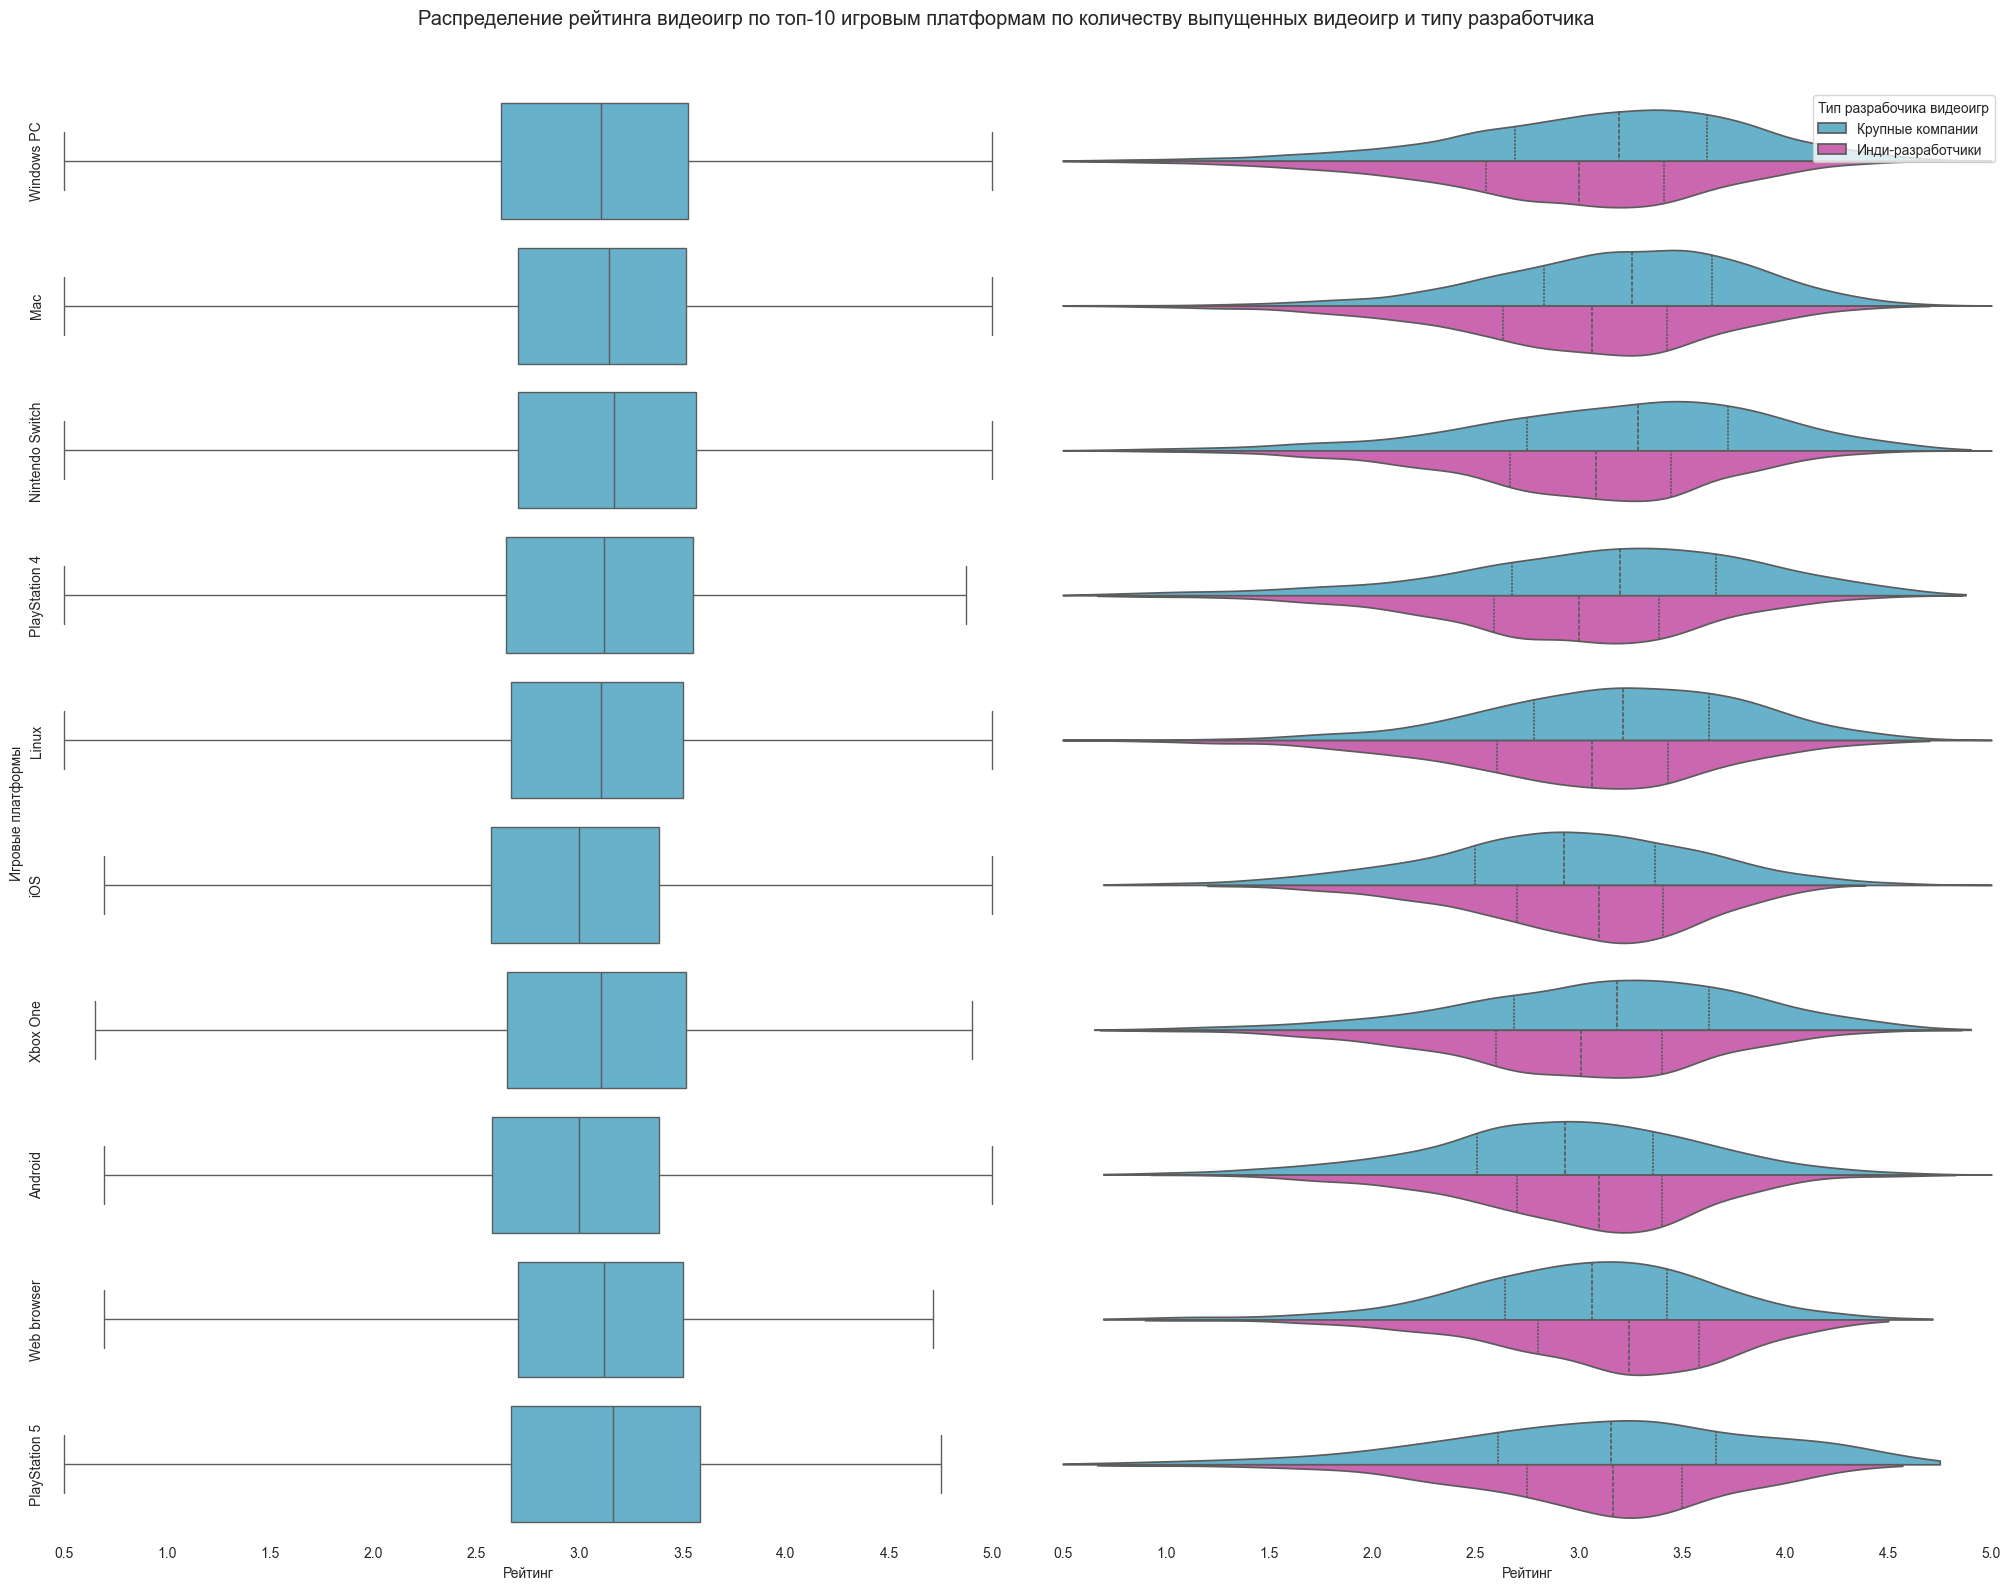

In [88]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение рейтинга видеоигр '
       'по топ-10 игровым платформам по количеству выпущенных видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

platforms = df['platforms']['platform'].value_counts()[:10].index
plot_data = (df['platforms'][df['platforms']['platform'].isin(platforms)]
             .join(df['games'][['id', 'rating', 'indie']].set_index('id'), on='id')
             .replace({True: 'Инди-разработчики', 
                       False: 'Крупные компании'}))

sns.boxplot(
    data=plot_data,
    x='rating',
    y='platform',
    order=platforms,
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='rating',
    y='platform',
    order=platforms,
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    split=True,
    cut=0.0,
    inner="quart",
    bw_adjust=1.0,
    ax=figure.axes[1],
    palette=sns.color_palette('hls', 15)[8::5]
)

for i in range(2):
    figure.axes[i].set_xlabel('Рейтинг')
    figure.axes[i].set_ylabel('Игровые платформы' if not i else '')
    figure.axes[i].set_xbound((0.45, 5.05))
    figure.axes[i].set_xticks(np.linspace(0.5, 5.0, 10))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=platforms.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([])
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper right', 
    alignment='left'
);

**Игровые платформы не оказывают** (было рассмотренно топ-10 игровых платформ по количеству выпущенных видеоигр) существенного влияния на распределение рейтинга видеоигр. Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых платформ, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.

Посмотрим, как распределен рейтинг видеоигр по топ-10 игровых жанрам по количеству выпущенных видеоигр и по типу разработчика.

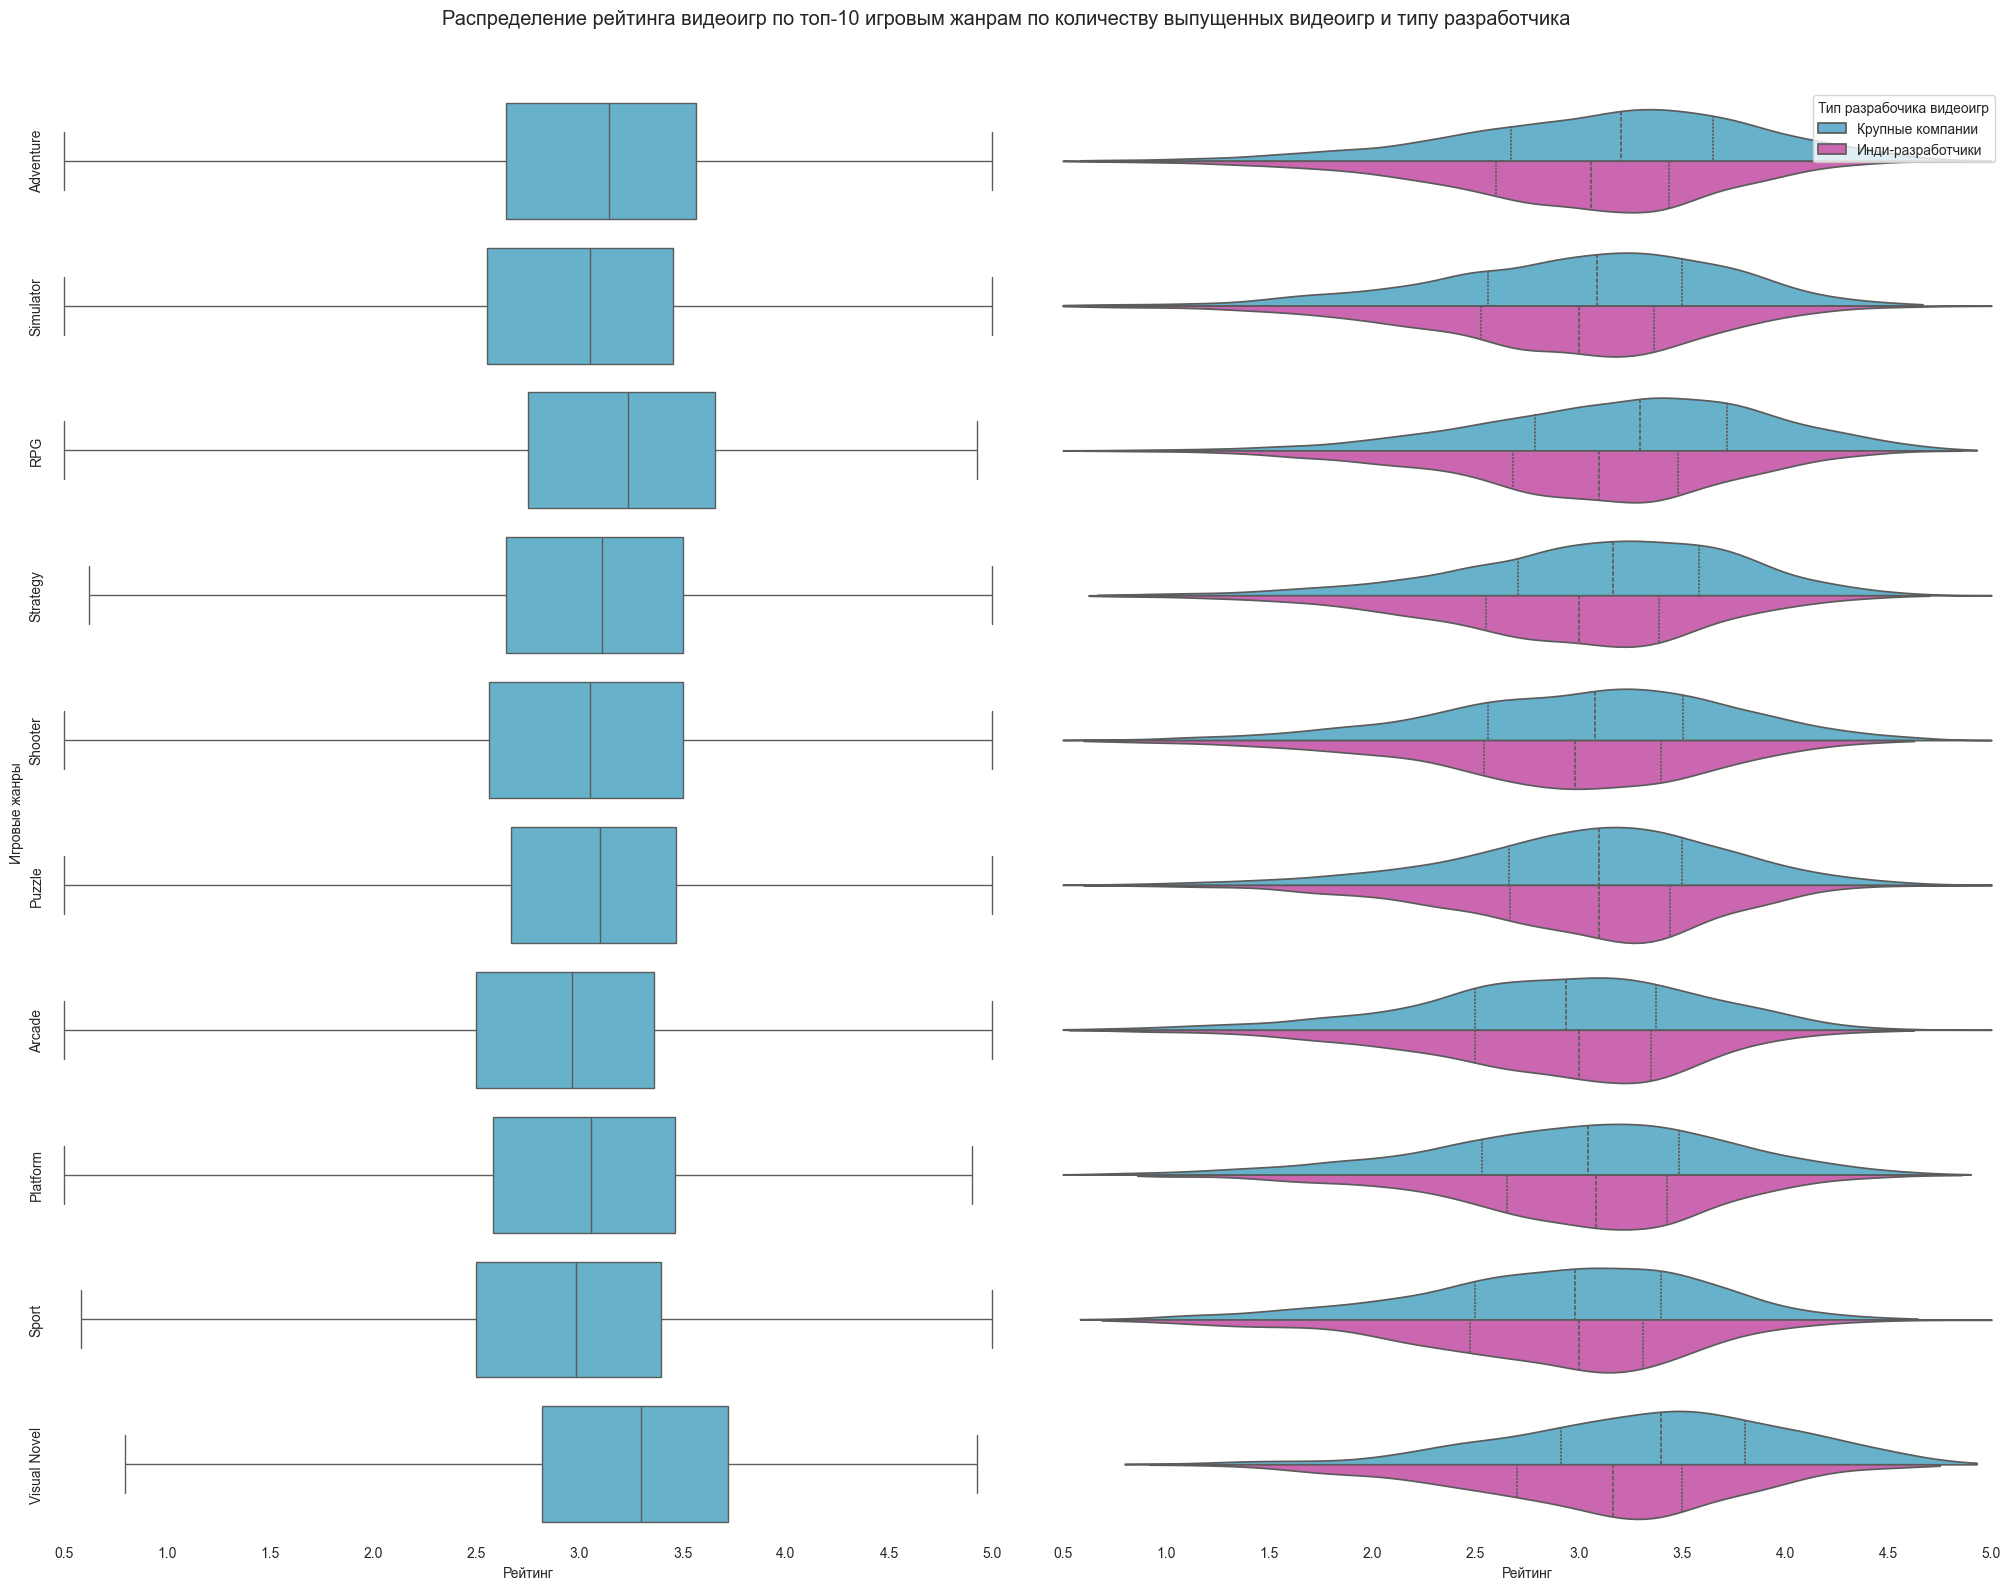

In [89]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение рейтинга видеоигр '
       'по топ-10 игровым жанрам по количеству выпущенных видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

genres = df['genres']['genre'].value_counts()[:10].index
plot_data = (df['genres'][df['genres']['genre'].isin(genres)]
             .join(df['games'][['id', 'rating', 'indie']].set_index('id'), on='id')
             .replace({True: 'Инди-разработчики', 
                       False: 'Крупные компании'}))

sns.boxplot(
    data=plot_data,
    x='rating',
    y='genre',
    order=genres,
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='rating',
    y='genre',
    order=genres,
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    split=True,
    cut=0.0,
    inner="quart",
    bw_adjust=1.0,
    ax=figure.axes[1],
    palette=sns.color_palette('hls', 15)[8::5]
)

for i in range(2):
    figure.axes[i].set_xlabel('Рейтинг')
    figure.axes[i].set_ylabel('Игровые жанры' if not i else '')
    figure.axes[i].set_xbound((0.45, 5.05))
    figure.axes[i].set_xticks(np.linspace(0.5, 5.0, 10))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=genres.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([])
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper right', 
    alignment='left'
);

**Игровые жанры оказывают большее влияние** (было рассмотренно топ-10 игровых жанров по количеству выпущенных видеоигр), на распределение рейтинга видеоигр чем игровые платформы. Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых жанров, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.

## Анализ категориальных данных 

Посмотрим на описательную статистику категориальных данных.

In [90]:
arrays = [[], []]
for name in ['games', 'developers', 'genres', 'platforms']:
    columns = (df[name]
               .select_dtypes(include='object')).columns.to_list()
    arrays[0] += [name] * len(columns)
    arrays[1] += columns
columns = pd.MultiIndex.from_arrays(
    arrays=arrays,
    names=['Набор данных', 'Поля']
)

categories = pd.DataFrame(
    columns=columns,
    index=['count', 'unique', 'top', 'freq']
)

for name in ['games', 'developers', 'genres', 'platforms']:
    values = (df[name]
              .select_dtypes(include='object')
              .describe())
    for column in values.columns:
        for index in categories.index:
            categories.loc[index, (name, column)] = values.loc[index, column]

categories

Набор данных   games                                                     \
Поля            name                                        description   
count         141741                                             128451   
unique        135767                                             127007   
top           Tetris  Are you the new quiz master and can you beat y...   
freq              25                                                 17   

Набор данных developers     genres   platforms  
Поля          developer      genre    platform  
count            122781     198108      224888  
unique            30401         22         199  
top            Nintendo  Adventure  Windows PC  
freq               1706      41451       70458

Всего в данных имеется: 
- более **30 тыс.** разработчиков видеоигр;
- более **190** игровых платформ;
- более **22** жанров видеоигр.

Посмотрим на распределение количества выпущенных видеоигр по типу разработчика.

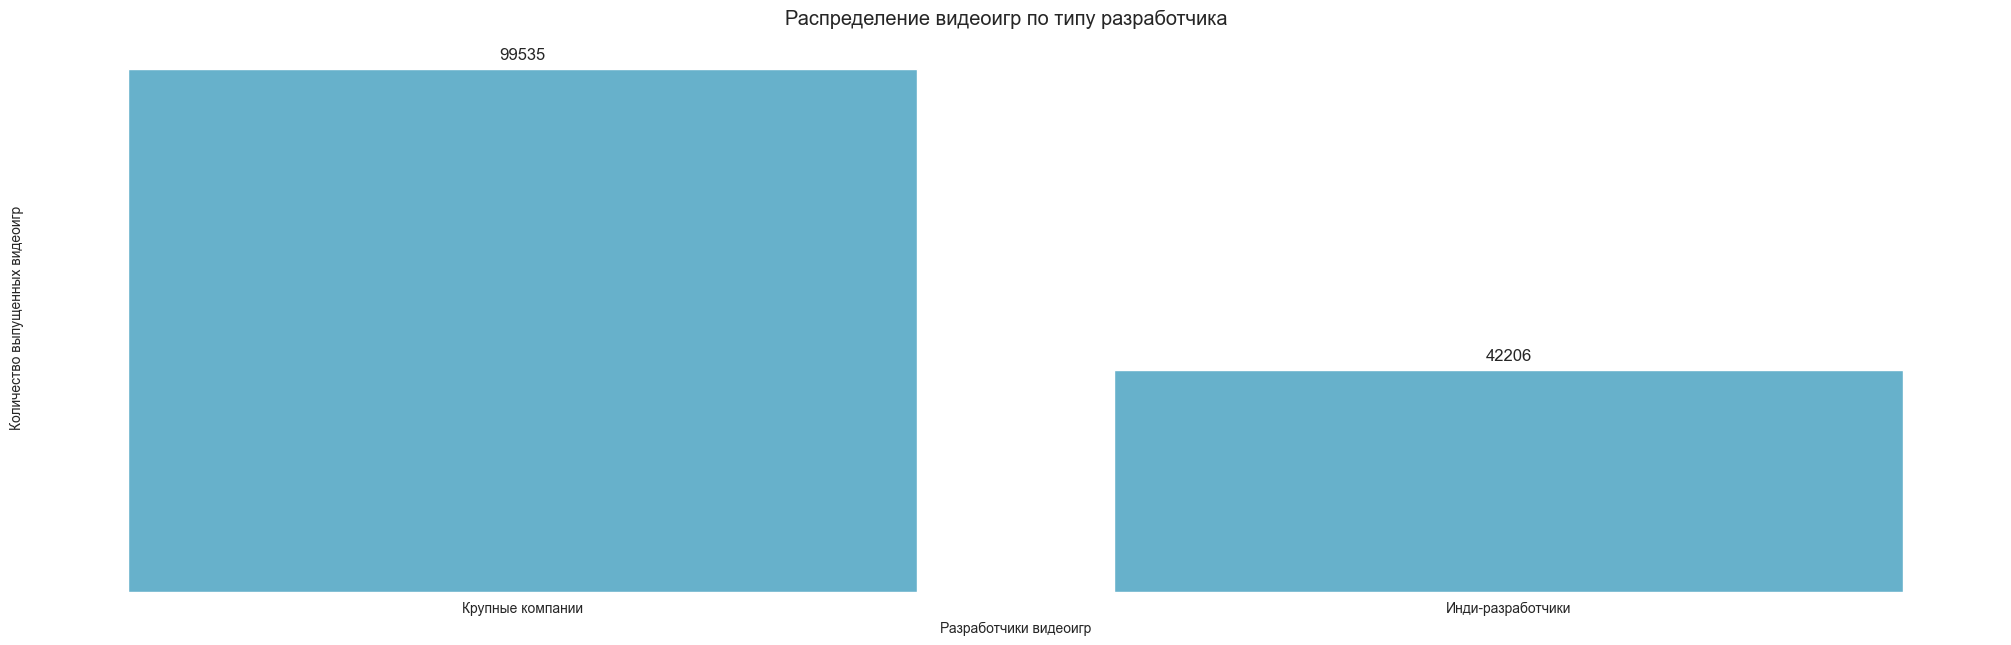

In [91]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 6)
)

figure.suptitle(
    t='Распределение видеоигр по типу разработчика', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df['games'].loc[:, 'indie']
             .value_counts()
             .rename(index={False: 'Крупные компании', 
                            True: 'Инди-разработчики'}))

sns.barplot(
    x=plot_data.index,
    y=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Разработчики видеоигр')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Крупных компаний** приблизительно в 2.5 раза больше, чем **инди-разработчиков**.

### Анализ игровых платформ

Посмотрим на топ-15 игровых платформ по количеству выпущенных видеоигр.

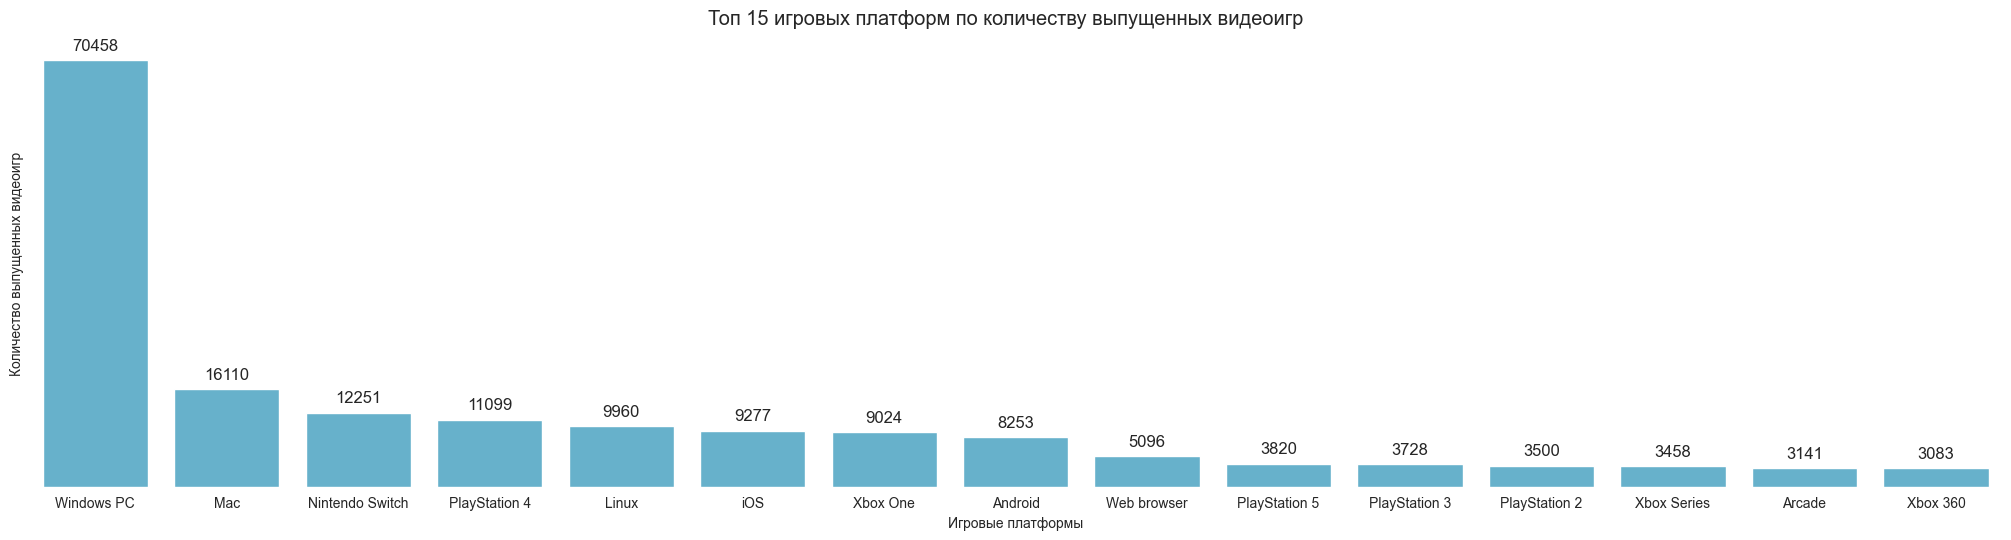

In [92]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df['platforms']
             .loc[:, 'platform']
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **70 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Mac** и **Nintendo Switch**, для них было вупущенно более **16 тыс.** и более **12 тыс.** видеоигр соответственно.

Посмотрим на распределение количества выпущенных видеоигр по типам разработчиков среди топ-15 игровых платформ.

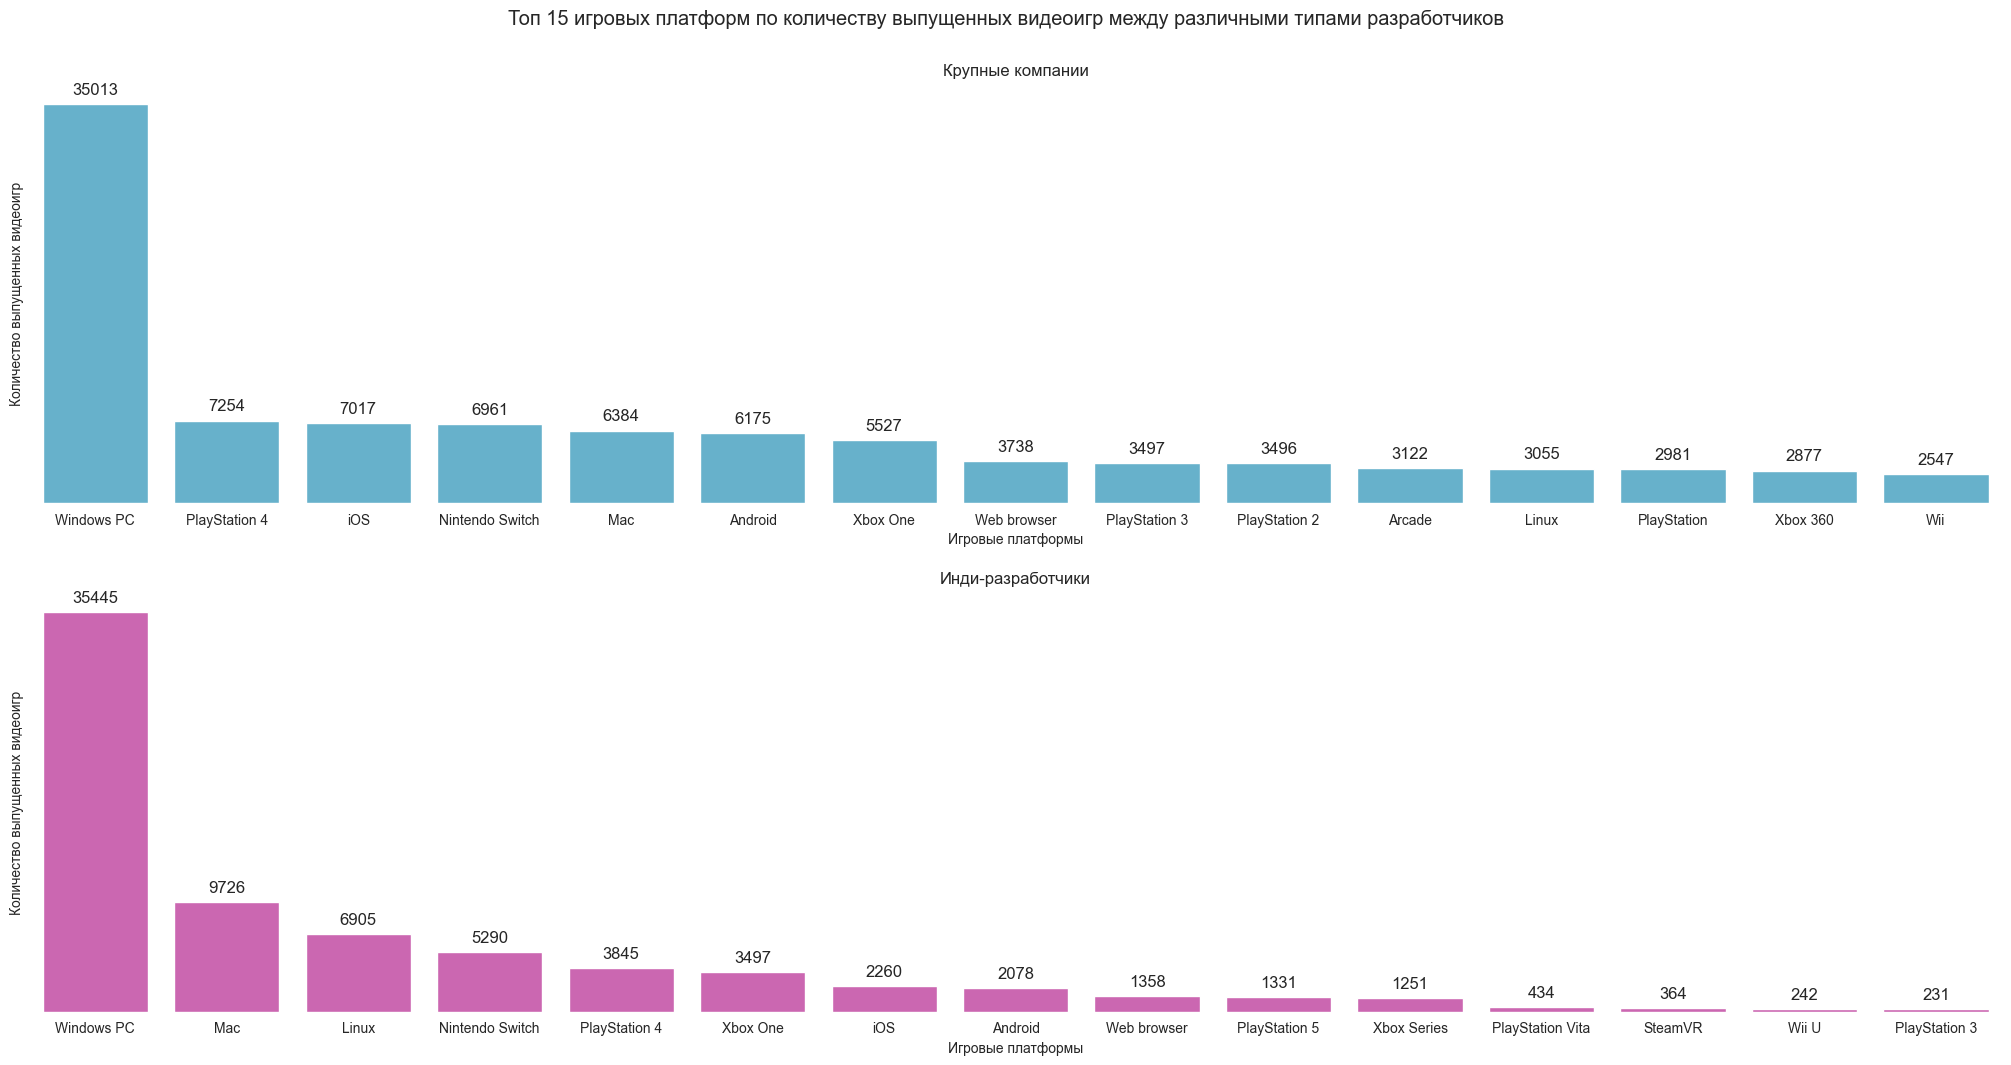

In [93]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых платформ по количеству выпущенных видеоигр '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df['platforms']
             .join(df['games'][['id', 'indie']].set_index('id'), on='id'))
plot_data = plot_data.loc[~plot_data['indie'], 'platform'].value_counts()[:15]

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['platforms']
             .join(df['games'][['id', 'indie']].set_index('id'), on='id'))
plot_data = plot_data.loc[plot_data['indie'], 'platform'].value_counts()[:15]

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые платформы')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также для платформы **Windows PC**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются **PlayStation 4** и **IOS**, для них было вупущенно более **7 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются **Mac** и **Linux**, для них было вупущенно более **9 тыс.** и более **6 тыс.** видеоигр соответственно.

Посмотрим на распределение общего количества игроков среди топ-15 игровых платформ.

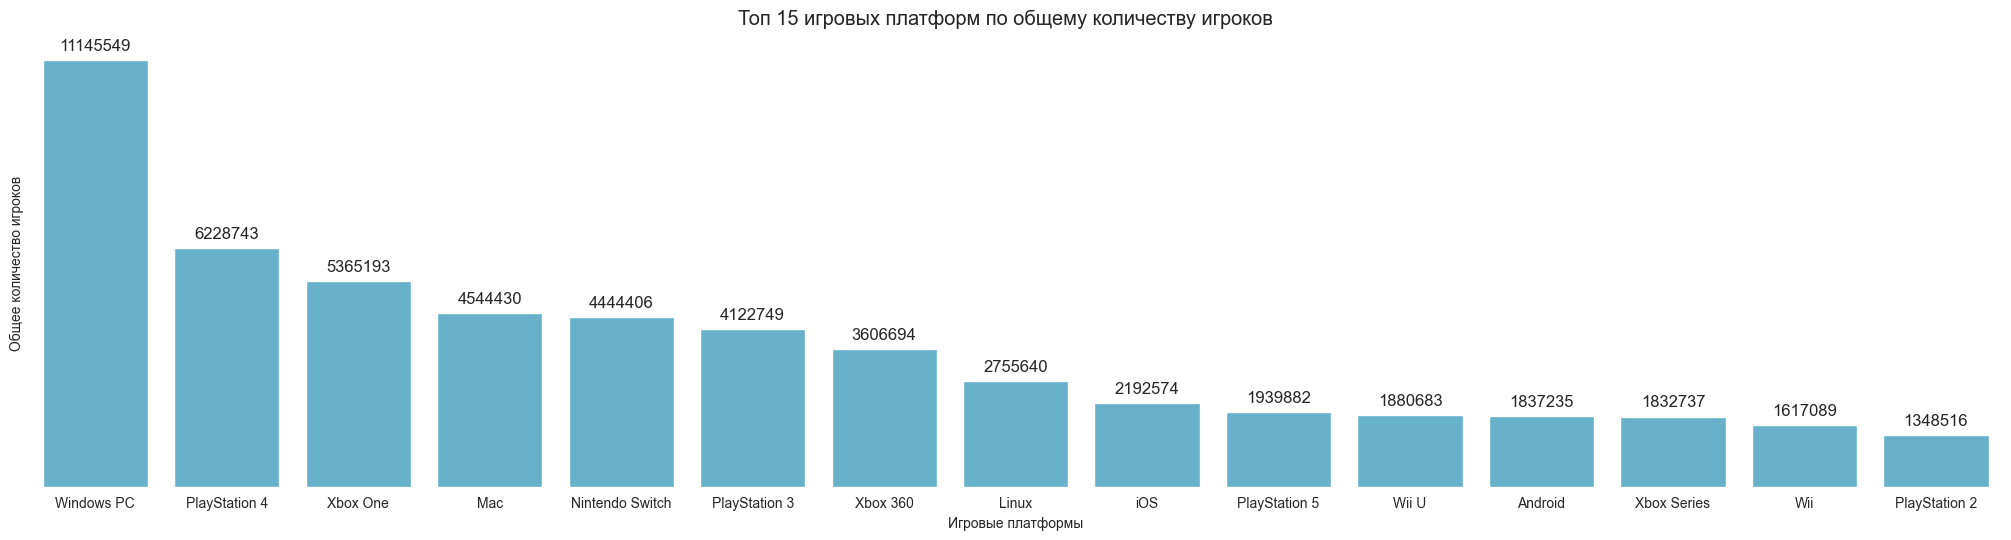

In [94]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству игроков', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df['platforms']
             .join(df['games'][['id', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .groupby('platform')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общее количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**, более **11.1 млн.** игроков. Следующими по количеству игроков являются **PlayStation 4** и **Xbox One**, для данных платформ, количество игроков достигает более **6.2 млн.** и более **5.3 млн.** соответственно.

Посмотрим на распределение общего количества игроков по типам разработчиков среди топ-15 игровых платформ.

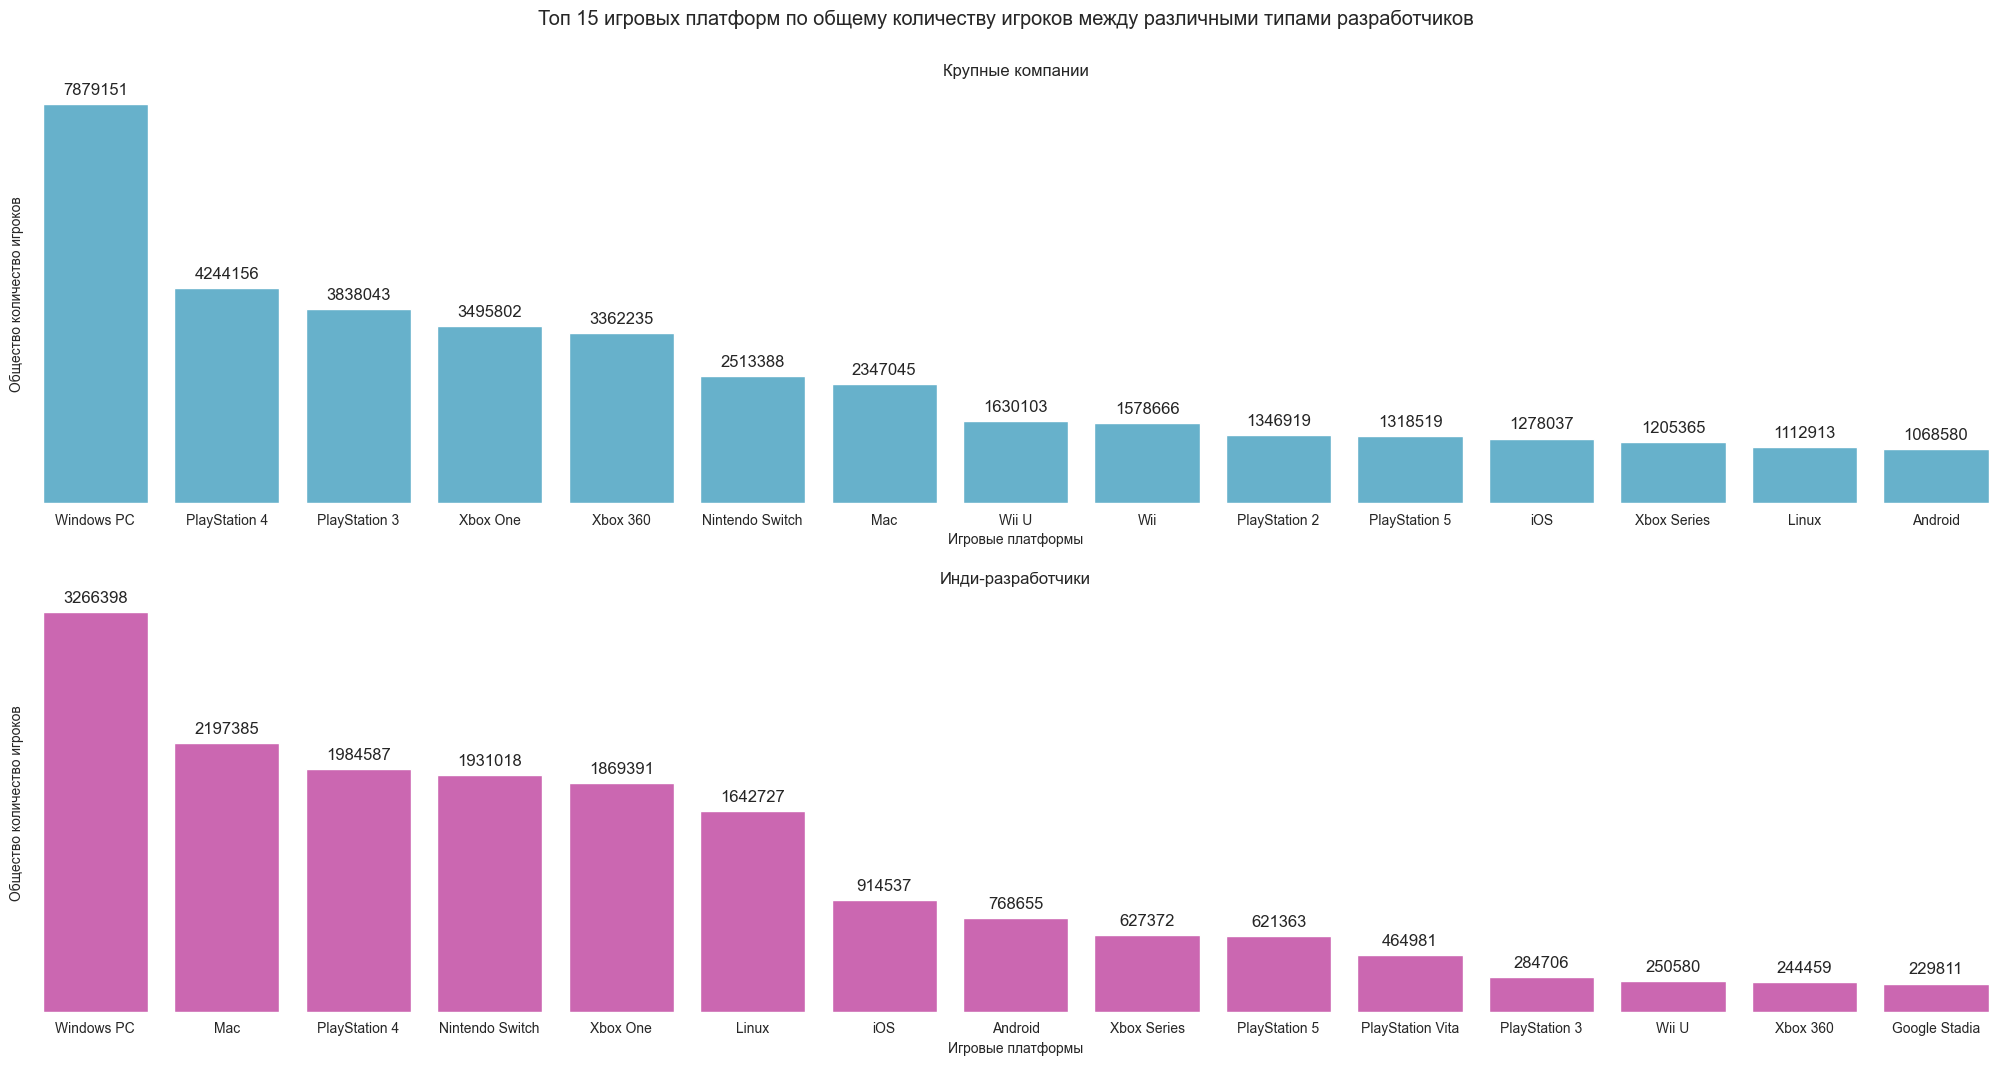

In [95]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству игроков '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df['platforms']
             .join(df['games'][['id', 'indie', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .loc[~plot_data['indie'], ['platform', 'plays']]
             .groupby('platform')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общество количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
)

plot_data = (df['platforms']
             .join(df['games'][['id', 'indie', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .loc[plot_data['indie'], ['platform', 'plays']]
             .groupby('platform')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые платформы')
figure.axes[1].set_ylabel('Общество количество игроков')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены для платформ **PlayStation 4** и **PlayStation 3**, для данных платформ, количество игроков достигает более **4.2 млн**. и более **3.8 млн.** соответственно. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены для платформ **Mac** и **PlayStation 4**, для данных платформ, количество игроков достигает более **2.1 млн**. и более **1.9 млн.** соответственно.

### Анализ игровых жанров

Посмотрим на топ-15 игровых жанров по количеству выпущенных видеоигр.

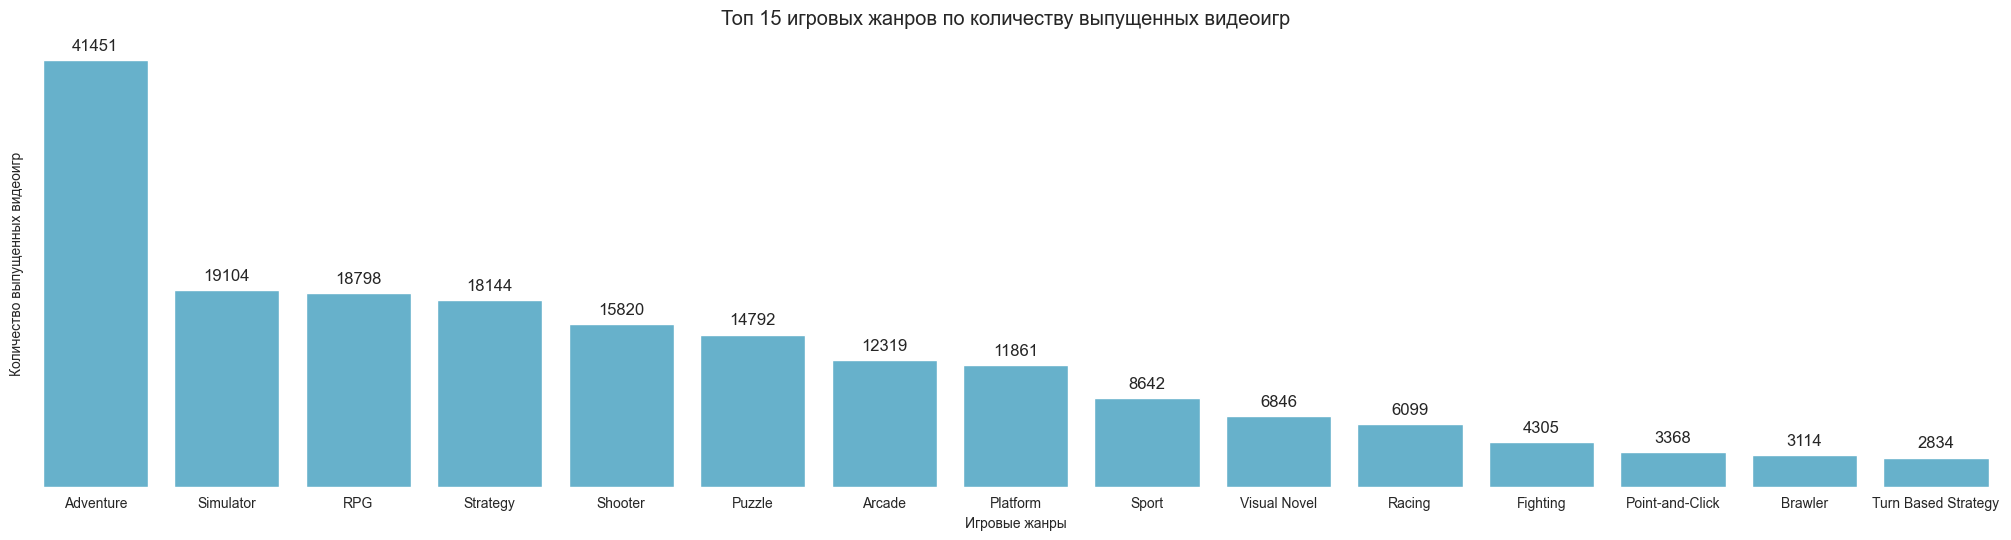

In [96]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых жанров по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df['genres']
             .loc[:, 'genre']
             .explode()
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено в жанре **Adventure**, более **41 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются жанры **Simulator** и **RPG**, в данных жанрах было вупущенно более **18.5 тыс.** видеоигр.

Посмотрим на распределение количества выпущенных видеоигр по типам разработчиков среди топ-15 игровых жанров.

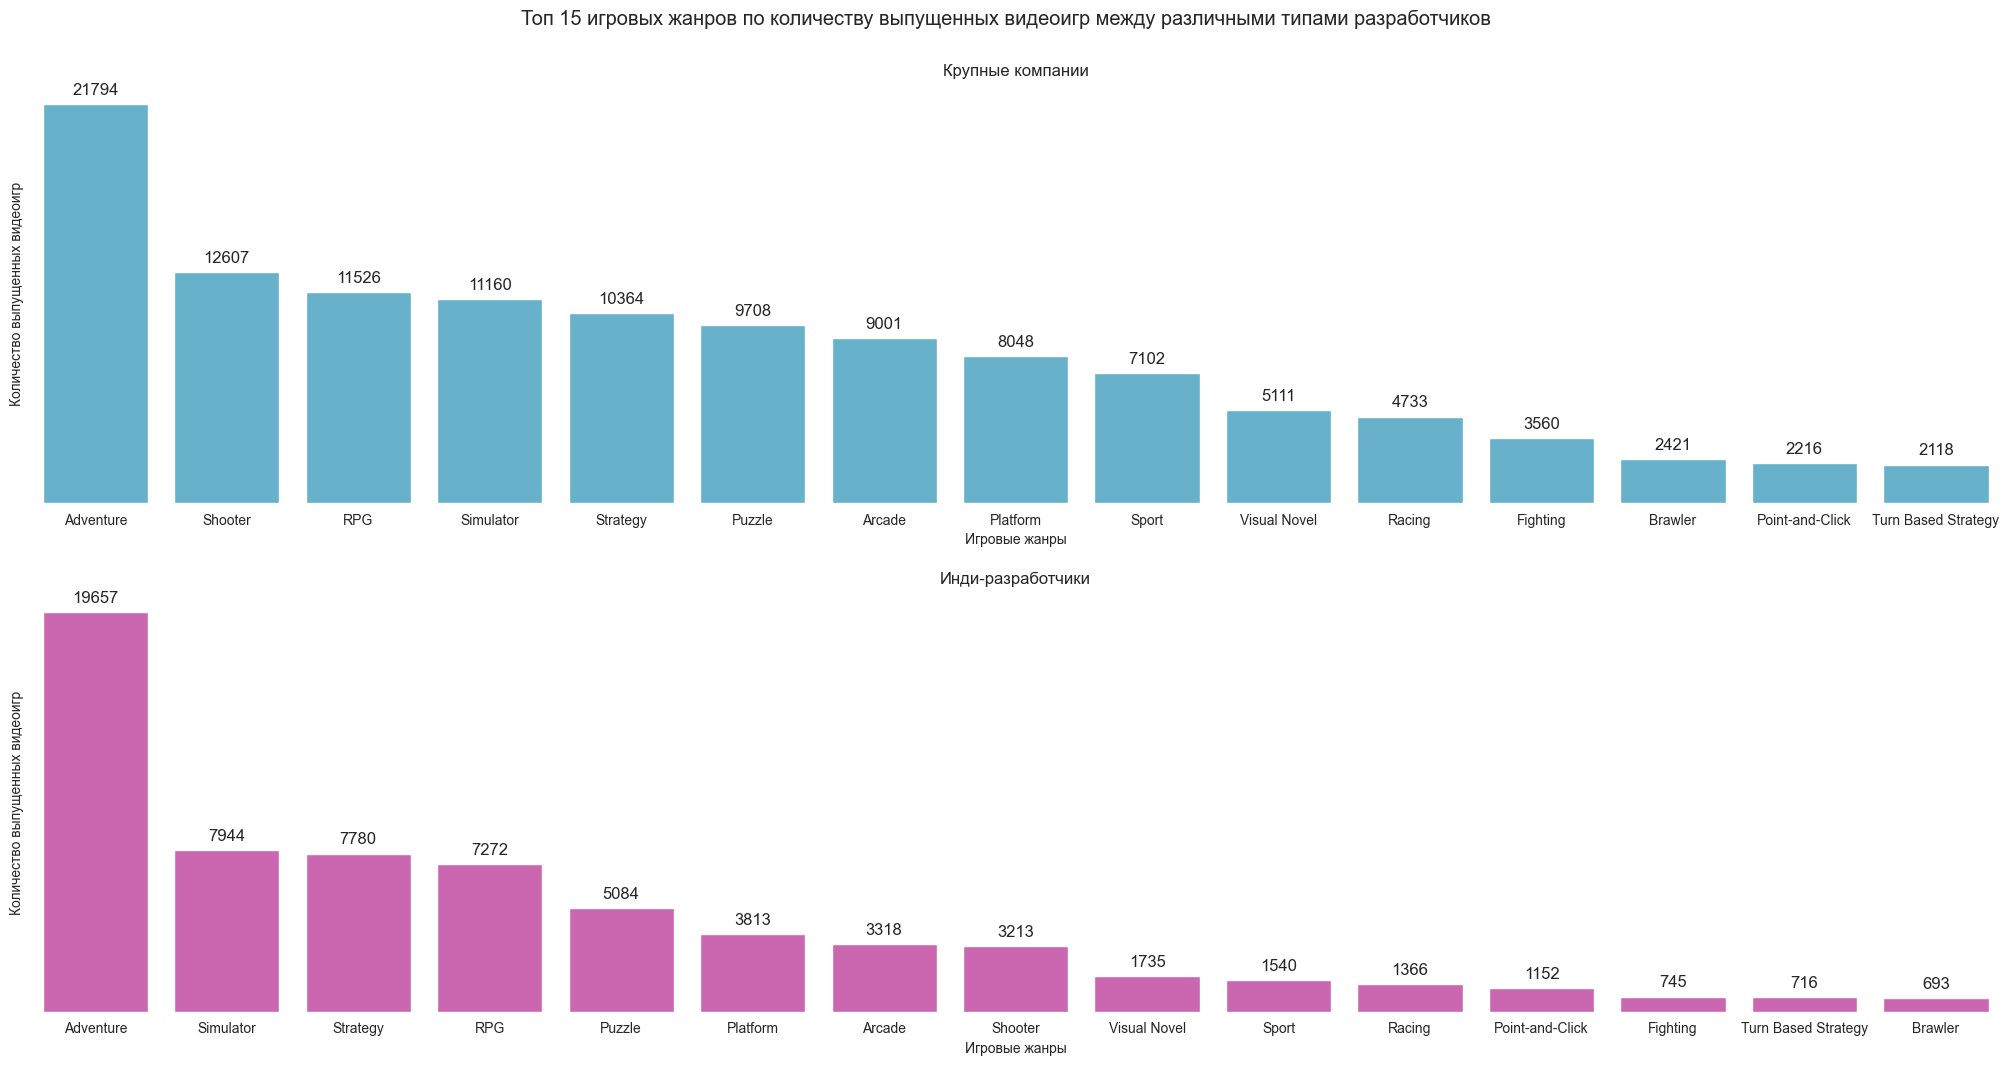

In [97]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых жанров по количеству выпущенных видеоигр '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df['genres']
             .join(df['games'][['id', 'indie']].set_index('id'), on='id'))
plot_data = plot_data.loc[~plot_data['indie'], 'genre'].value_counts()[:15]

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['genres']
             .join(df['games'][['id', 'indie']].set_index('id'), on='id'))
plot_data = plot_data.loc[plot_data['indie'], 'genre'].value_counts()[:15]


sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые жанры')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также в жанре **Adventure**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются жанры **Shooter** и **RPG**, в данных жанрах было вупущенно более **11.5 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются жанры **Simulator** и **Strategy**, в данных жанрах было вупущенно более **7.5 тыс.** видеоигр.

Посмотрим на распределение общего количества игроков среди топ-15 игровых жанров.

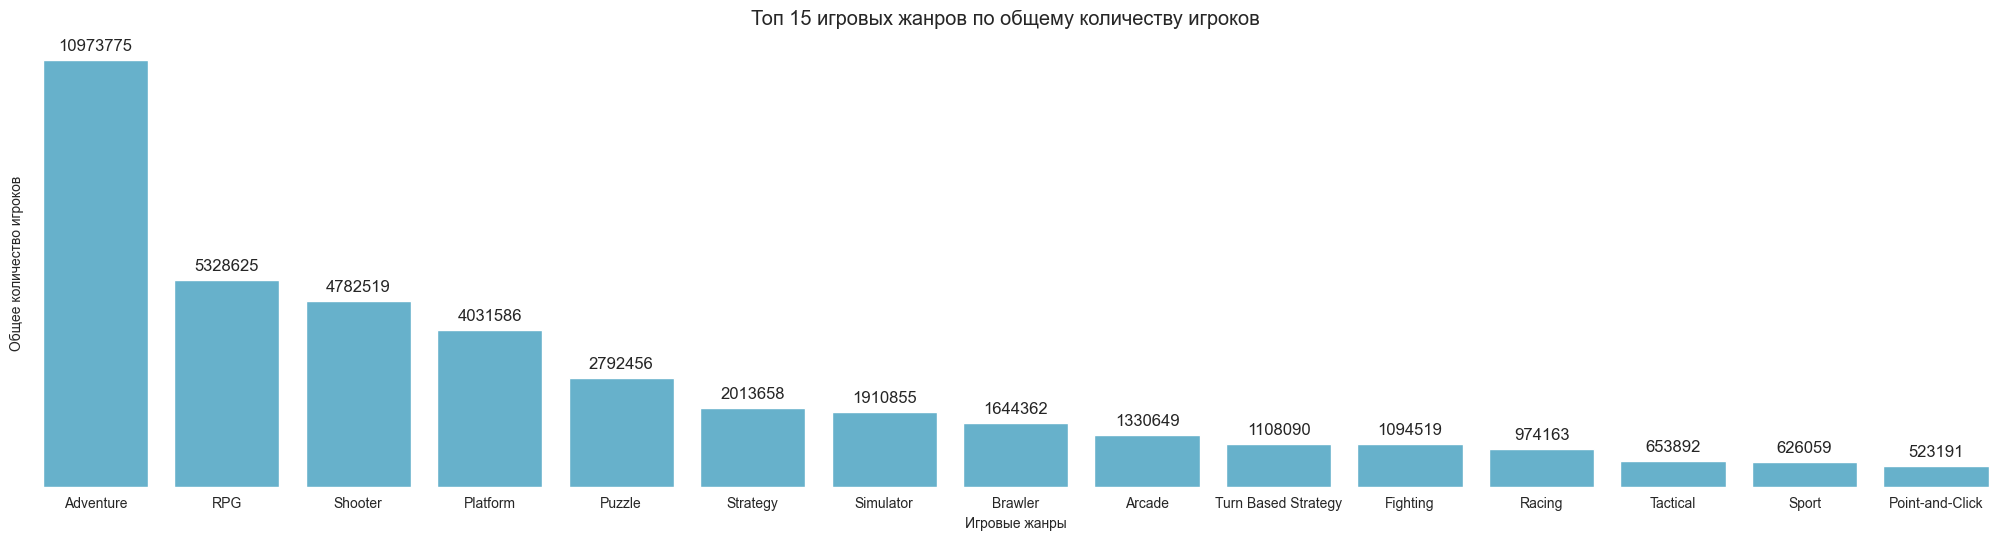

In [98]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых жанров по общему количеству игроков', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df['genres']
             .join(df['games'][['id', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .groupby('genre')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Общее количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**, более **10.5 млн.** игроков. Следующими по количеству игроков являются жанры **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **5 млн.** и более **4.5 млн.** игроков соответственно.

Посмотрим на распределение общего количества игроков по типам разработчиков среди топ-15 игровых жанров.

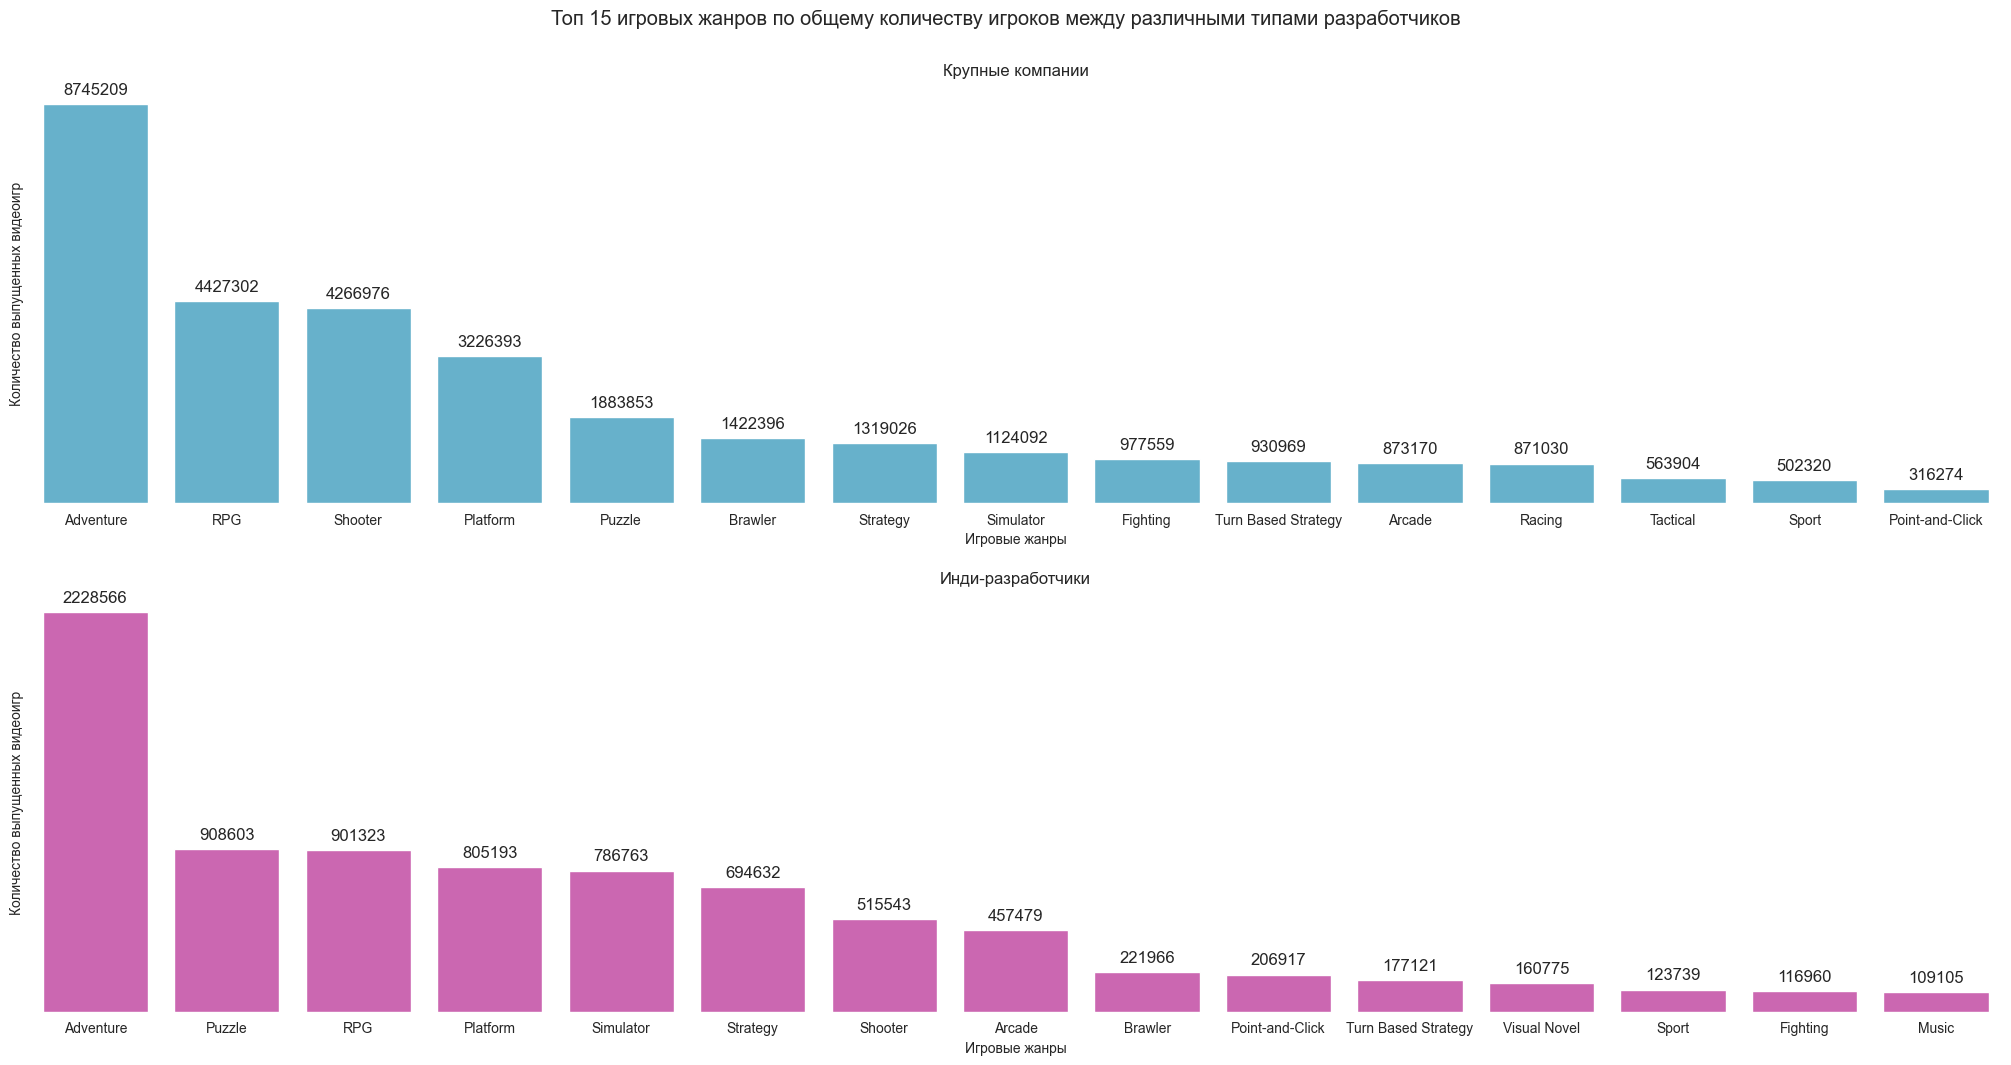

In [99]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых жанров по общему количеству игроков '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df['genres']
             .join(df['games'][['id', 'indie', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .loc[~plot_data['indie'], ['genre', 'plays']]
             .groupby('genre')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
)

plot_data = (df['genres']
             .join(df['games'][['id', 'indie', 'plays']].set_index('id'), on='id'))
plot_data = (plot_data
             .loc[plot_data['indie'], ['genre', 'plays']]
             .groupby('genre')['plays']
             .sum()
             .sort_values(ascending=False)[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые жанры')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **4.2 млн**. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены в жанрах **Puzzle** и **RPG**, для данных жанров, количество игроков достигает более **900 тыс**.

# Выводы
***

**Выводы по предварительной обработке данных**.
1. Названия полей оставлены **без изменений**.
2. Целостность данных **не нарушена** (для каждой записи имеется первичный ключ).
3. Удалено менее **10** явных дубликатов.
4. Изменена структура данных:
    - добавлено логическое поле **indie**;
    - удалено значение **indie** из поля **genres**;
    - уточнено поле **rating** на основе данных **scores**;
    - добавлено поле **votes**.
5. Удалено менее **1000** (**0.80%**) записей с отсутствующими значениями в полях **name**, **reviews**, **plays**, **playing**, **backlogs** и **wishlists**.
6. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**.
7. **Удалены записи** (неявные дубликаты), дублирующие значения в полях **name** и **date** - более **30 тыс.** (**17.50%**).
8. Более **4000** (**19.75%**) постеров не имеют информации о видеоигре (в связи удалением неявных дубликатов). Более **4000** (**19.75%**) видеоигр не имеют постера.
   
**Выводы по разведочному анализу данных**:
1. Дата выпуска видеоигр:
   - самая **первая видеоигра** была выпущена в **1947** году. **Резкий подъем** количества выпущенных видеоигр начинается в **2013** году и достигает свого **пика** в **2021** году (приблизительно **8500** видеоигр);
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то самая **первая видеоигра крупной компанией** была выпущена в **1947** году, а **инди-разаботчиком** в **1970**. **Резкого подъема** количества выпущенных видеоигр **крупными компаниями** не наблюдается, а выпуск видеоигр **инди-разработчиками** начал активноый рост в **2013** году. Наибольшее количество видеоигр было выпущено **крупными компаниями** в **2023** году (приблизительно **4500** видеоигр), **инди-разработчиками** в **2021** (приблизительно **4200** видеоигр). С **2016** по **2021** год количество выпущенных видеоигр **инди-разработчиками** превышало количество выпущенных видеоигр **крупными компаниями**;
   - наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа;
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для **крупных компаний** закономерность остается прежней, наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа. Для **инди-разрабочиков** количество выпущенных видеоигр **распределено равномерно** между месяцами и дням месяца. Вероятнее всего, в **крупных компаниях** дата выпуска видеоигр **планируется заранее**;
   - **средний ретинг** видеоигр распределен по годам выпуска видеоигр **равномерно** и равен приблизительно **3.0**,  за исключением периода с **1947** по **1985**, когда видеоигры выпускались в не таком большом количестве;
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то закономерность остается прежней, за исключением того, что в разные временные периоды, средний рейтинг видеоигр был больше у **крупных компаний** или **инди-разработчиков**;
   - **общее количество игроков**, игравших в видеоигры, **увеличивалось** вместе с годом выхода видеоигр и достигло **пика** в **2017** году (приблизительно **1.15 млн.** игроков), после чего, стало **снижаться** (в игры, вышедшие в **2022** году играло приблизительно **500 тыс.** игроков).
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то акивный рост общего количества игроков видеоигр, выпущенных **крупными компаниями** начался в **1985** году, а выпущенных **инди-разработчиками** в **2009**.
2. Анализ числовых данных:
    - более **90%** видеоигр имеют:
        - **рейтинг** - менее  **3.9**;
        - **количество голосов** - менее **40**;
        - **количество отзывов** - менее **5**;
        - **общее количество игроков**, менее **70**;
        - **количество игроков**, играющих в видеоигру в настоящий момент менее **5**;
        - **количество игроков**, добавивших видеоигру в **backlog** или **wishlists** - менее **30**.
    - **Наибольшей** линейной зависимостью (коэфициент корреляции Пирсона) обладают:
        - **plays** (**общее количество игроков**) и **votes** (**количество голосов**): 1.00;
        - **reviews** (**количество отзывов**) и **votes** (**количество голосов**): 0.94;
        - **plays** (**общее количество игроков**) и **reviews** (**количество отзывов**): 0.92;
    - **Нименьшей** линейной зависимостью обладает рейтинг видеоигр. Коэфициент корреляции Пирсона с другими полями не превосходит **0.20**.
    1. Анализ рейтинга видеоигр:
        - распределение рейтинга видеоигр (поле **rating**) очень близко к **нормальному**.
        - зависимость рейтинга видеоигр от других числовых переменных незначительна (коэффициент корреляции Пиросна менее 0.20). Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то зависимость рейтинга видеоигр от других числовых переменных **не изменится**.
        - **игровые платформы не оказывают** (было рассмотренно топ-10 игровых платформ по количеству выпущенных видеоигр) существенного влияния на распределение рейтинга видеоигр.
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых платформ, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг **ниже**, чем видеоигры выпущенные **крупными компаниями**.
        - **игровые жанры оказывают большее влияние** (было рассмотренно топ-10 игровых жанров по количеству выпущенных видеоигр), на распределение рейтинга видеоигр чем игровые платформы.
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых жанров, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.
3. Анализ категориальных данных:
    - Всего в данных имеется: 
        - более **30 тыс.** разработчиков видеоигр;
        - более **190** игровых платформ;
        - более **22** жанров видеоигр.
    - **крупных компаний** приблизительно в 2.5 раза больше, чем **инди-разработчиков**.
    1. Анализ игровых платформ:
        - **наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **70 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Mac** и **Nintendo Switch**, для них было вупущенно более **16 тыс.** и более **12 тыс.** видеоигр соответственно.;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также для платформы **Windows PC**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются **PlayStation 4** и **IOS**, для них было вупущенно более **7 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются **Mac** и **Linux**, для них было вупущенно более **9 тыс.** и более **6 тыс.** видеоигр соответственно;
        - **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**, более **11.1 млн.** игроков. Следующими по количеству игроков являются **PlayStation 4** и **Xbox One**, для данных платформ, количество игроков достигает более **6.2 млн.** и более **5.3 млн.** соответственно.;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены для платформ **PlayStation 4** и **PlayStation 3**, для данных платформ, количество игроков достигает более **4.2 млн**. и более **3.8 млн.** соответственно. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены для платформ **Mac** и **PlayStation 4**, для данных платформ, количество игроков достигает более **2.1 млн**. и более **1.9 млн.** соответственно.
    2. Игровые жанры:
        - **наибольшее** количество видеоигр выпущено в жанре **Adventure**, более **41 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются жанры **Simulator** и **RPG**, в данных жанрах было вупущенно более **18.5 тыс.** видеоигр;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также в жанре **Adventure**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются жанры **Shooter** и **RPG**, в данных жанрах было вупущенно более **11.5 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются жанры **Simulator** и **Strategy**, в данных жанрах было вупущенно более **7.5 тыс.** видеоигр;
        - **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**, более **10.5 млн.** игроков. Следующими по количеству игроков являются жанры **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **5.3 млн.** и более **4.7 млн.** игроков соответственно;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **4.2 млн**. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены в жанрах **Puzzle** и **RPG**, для данных жанров, количество игроков достигает более **900 тыс**.